<p style="text-align:center;">
    <span style="font-family: Tahoma; font-weight: bold; font-size: 40px; color: black;">Machine Learning in Medicine</span>
</p>

<p style="text-align:center;">
    <span style="font-family: Tahoma; font-weight: bold; font-size: 40px; color: black;">Final Project</span>
</p>

<p style="text-align:center;">
    <span style="font-family: Tahoma; font-size: 20px; color: black;">Liron Firuz</span>
</p>


<p style="text-align:center;">
    <span style="font-family: Tahoma; font-size: 20px; color: black;">Tamar Mordehay</span>
</p>

<p style="text-align:center;">
    <span style="font-family: Tahoma; font-size: 20px; color: black;">Ofir Tzafrir</span>
</p>

<div>
<img src="https://www.atousante.com/en/wp-content/uploads/2018/02/V3-Examen-medical.jpg" width="650"/>
</div>

---
<p style="text-align:left;">
    <span style="font-family: Tahoma; font-weight: bold; font-size: 20px; color: black;">1. Data Exploration and Preprocessing</span>
</p>

In [1]:
import os
import shap
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc, silhouette_score
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [2]:
data = pd.read_excel('CKD dataset.xlsx')
data.head()

,StudyID,Gender,AgeBaseline,Age.3.categories,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,...,CholesterolBaseline,TriglyceridesBaseline,HgbA1C,CreatnineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35
0,1,0,64,1,0,0,0,0,1,1,...,4.8,0.92,5.90,59.0,93.319050,144,87,40.161842,98,0
1,2,0,52,1,0,0,0,0,1,1,...,6.4,1.84,6.00,52.0,105.833836,148,91,44.536941,106,0
2,3,0,56,1,0,0,0,0,1,1,...,6.4,1.75,5.90,57.0,99.839823,149,86,40.543437,88,0
3,4,0,58,1,0,0,0,0,0,1,...,5.1,1.22,5.50,65.0,90.315159,116,68,32.025584,103,0
4,5,0,63,1,1,0,0,0,1,1,...,5.0,1.11,7.46,70.0,79.725199,132,63,30.757401,105,0


In [3]:
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StudyID                491 non-null    int64  
 1   Gender                 491 non-null    int64  
 2   AgeBaseline            491 non-null    int64  
 3   Age.3.categories       491 non-null    int64  
 4   HistoryDiabetes        491 non-null    int64  
 5   HistoryCHD             491 non-null    int64  
 6   HistoryVascular        491 non-null    int64  
 7   HistorySmoking         491 non-null    int64  
 8   HistoryHTN             491 non-null    int64  
 9   HistoryDLD             491 non-null    int64  
 10  HistoryObesity         491 non-null    int64  
 11  DLDmeds                491 non-null    int64  
 12  DMmeds                 491 non-null    int64  
 13  HTNmeds                491 non-null    int64  
 14  ACEIARB                491 non-null    int64  
 15  Choles

#### Checking the columns that have missing values ​​in order to decide on the completion method

In [5]:
datac=data.copy()
datac = datac.dropna()
datac_TriglyceridesBaseline = pd.DataFrame(datac, columns=['TriglyceridesBaseline'])
datac_HgbA1C = pd.DataFrame(datac, columns=['HgbA1C'])

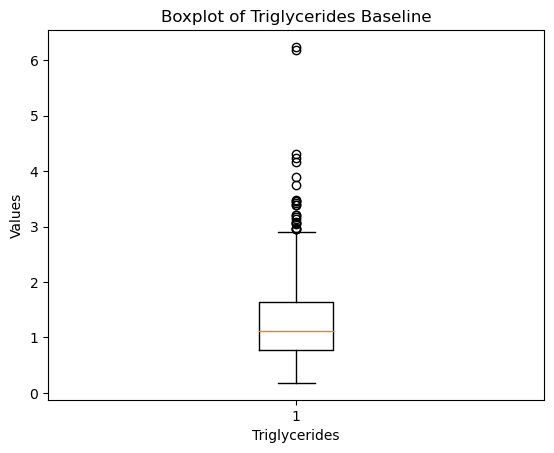

In [6]:
plt.boxplot(datac_TriglyceridesBaseline)
plt.title('Boxplot of Triglycerides Baseline')
plt.xlabel('Triglycerides')
plt.ylabel('Values')
plt.show()

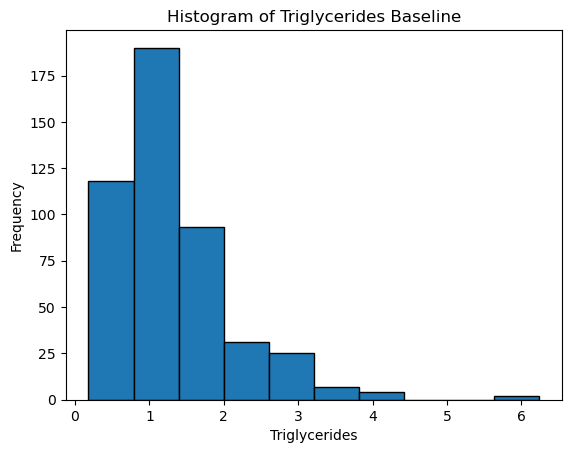

In [7]:
plt.hist(datac_TriglyceridesBaseline, bins=10, edgecolor='black')

plt.title('Histogram of Triglycerides Baseline')
plt.xlabel('Triglycerides')
plt.ylabel('Frequency')

plt.show()

In [8]:
print("median :" ,datac_TriglyceridesBaseline.median())
print("mean :" ,datac_TriglyceridesBaseline.mean())

median : TriglyceridesBaseline    1.11
dtype: float64
mean : TriglyceridesBaseline    1.322547
dtype: float64


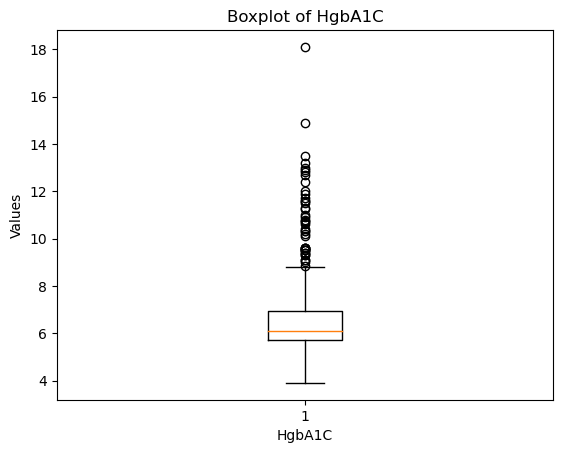

In [9]:
plt.boxplot(datac_HgbA1C)
plt.title('Boxplot of HgbA1C')
plt.xlabel('HgbA1C')
plt.ylabel('Values')
plt.show()

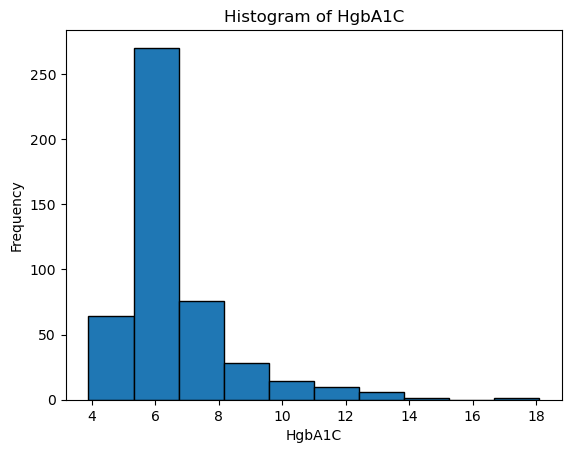

In [10]:
plt.hist(datac_HgbA1C, bins=10, edgecolor='black')

plt.title('Histogram of HgbA1C')
plt.xlabel('HgbA1C')
plt.ylabel('Frequency')

plt.show()

In [11]:
print("median :" ,datac_HgbA1C.median())
print("mean :" ,datac_HgbA1C.mean())

median : HgbA1C    6.1
dtype: float64
mean : HgbA1C    6.613957
dtype: float64


In [12]:
data['TriglyceridesBaseline'].fillna(data['TriglyceridesBaseline'].median(), inplace=True)
data['HgbA1C'].fillna(data['HgbA1C'].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StudyID                491 non-null    int64  
 1   Gender                 491 non-null    int64  
 2   AgeBaseline            491 non-null    int64  
 3   Age.3.categories       491 non-null    int64  
 4   HistoryDiabetes        491 non-null    int64  
 5   HistoryCHD             491 non-null    int64  
 6   HistoryVascular        491 non-null    int64  
 7   HistorySmoking         491 non-null    int64  
 8   HistoryHTN             491 non-null    int64  
 9   HistoryDLD             491 non-null    int64  
 10  HistoryObesity         491 non-null    int64  
 11  DLDmeds                491 non-null    int64  
 12  DMmeds                 491 non-null    int64  
 13  HTNmeds                491 non-null    int64  
 14  ACEIARB                491 non-null    int64  
 15  Choles

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

numerical_cols = ['CholesterolBaseline', 'TriglyceridesBaseline',
        'HgbA1C', 'CreatnineBaseline', 'eGFRBaseline', 'sBPBaseline',
        'dBPBaseline', 'BMIBaseline']

numerical_data = data[numerical_cols]

scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

standardized_df = pd.DataFrame(standardized_data, columns=numerical_cols)

data[numerical_cols] = standardized_df

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StudyID                491 non-null    int64  
 1   Gender                 491 non-null    int64  
 2   AgeBaseline            491 non-null    int64  
 3   Age.3.categories       491 non-null    int64  
 4   HistoryDiabetes        491 non-null    int64  
 5   HistoryCHD             491 non-null    int64  
 6   HistoryVascular        491 non-null    int64  
 7   HistorySmoking         491 non-null    int64  
 8   HistoryHTN             491 non-null    int64  
 9   HistoryDLD             491 non-null    int64  
 10  HistoryObesity         491 non-null    int64  
 11  DLDmeds                491 non-null    int64  
 12  DMmeds                 491 non-null    int64  
 13  HTNmeds                491 non-null    int64  
 14  ACEIARB                491 non-null    int64  
 15  Choles

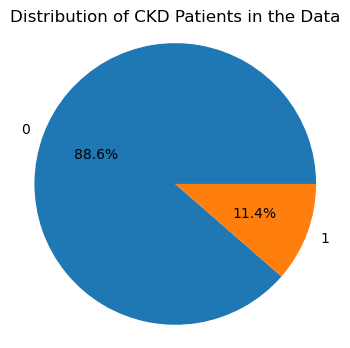

In [14]:
EventCKD35=data['EventCKD35'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(EventCKD35, labels=EventCKD35.index, autopct='%1.1f%%')
plt.title('Distribution of CKD Patients in the Data') 
plt.axis('equal')  
plt.show()

### Gender

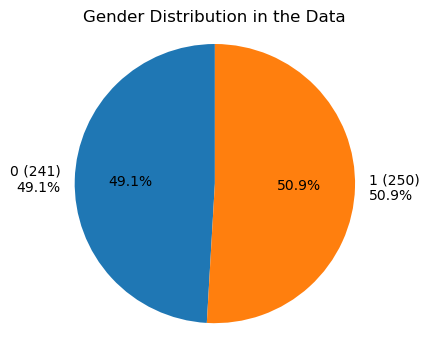

In [15]:
gender_counts = data.groupby('Gender')['EventCKD35'].count()
total_counts = gender_counts.sum()
percentages = gender_counts / total_counts * 100

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=[f'{gender} ({count})\n{percent:.1f}%' for gender, count, percent in zip(gender_counts.index, gender_counts, percentages)], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution in the Data')
plt.axis('equal') 
plt.show()

<Figure size 800x600 with 0 Axes>

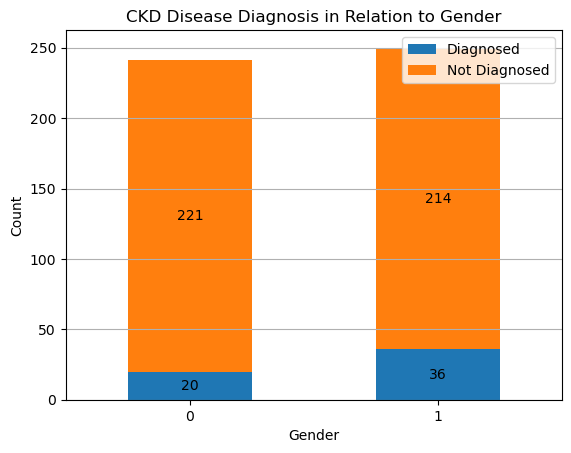

In [16]:
Gender_grouped_data = data.groupby('Gender')['EventCKD35'].value_counts().unstack()

plt.figure(figsize=(8, 6))
bars = Gender_grouped_data[[1, 0]].plot(kind='bar', stacked=True)

# Add count values above each bar
for bar in bars.containers:
    plt.bar_label(bar, label_type='center', fmt='%d')

# Adding titles and labels
plt.title('CKD Disease Diagnosis in Relation to Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(labels=['Diagnosed', 'Not Diagnosed'])
plt.grid(axis='y')

# Show the plot
plt.show()

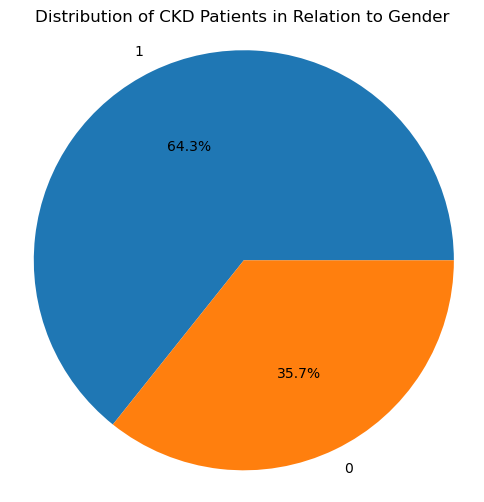

In [17]:
EventCKD35_1 = data[data['EventCKD35'] == 1]

gender_counts = EventCKD35_1['Gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
plt.pie(gender_counts,labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of CKD Patients in Relation to Gender')
plt.axis('equal')
plt.show()

### Age

#### First let's understand what the ages are in each group

In [18]:
age_ranges = data.groupby('Age.3.categories')['AgeBaseline'].agg(['min', 'max'])

print(age_ranges)

                  min  max
Age.3.categories          
0                  23   49
1                  50   64
2                  65   89


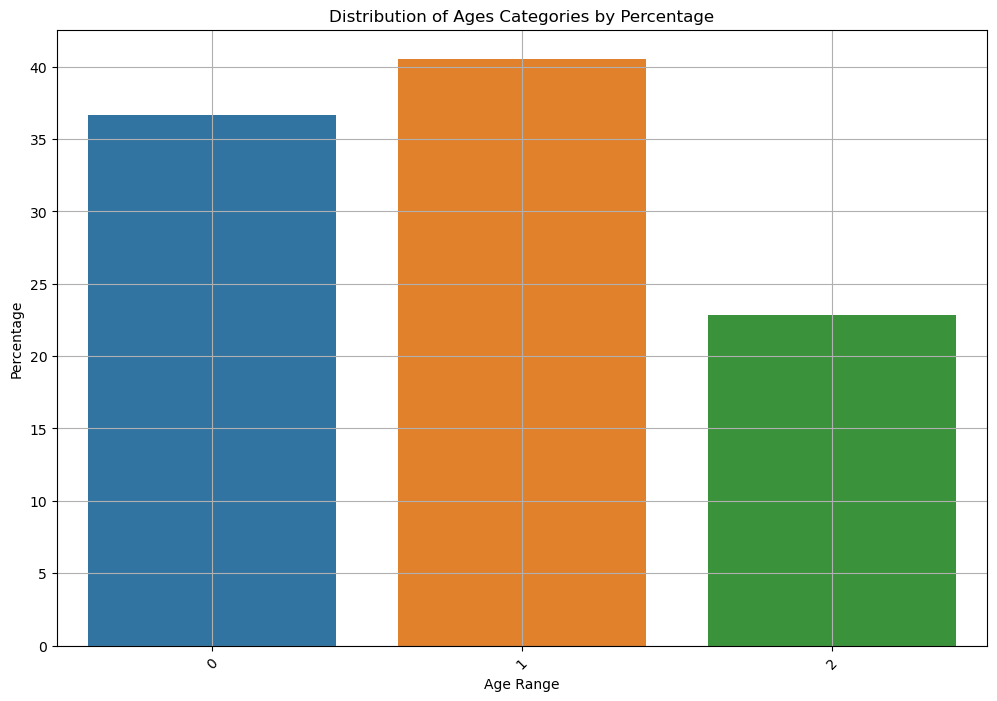

In [19]:
Age_categories_count = data['Age.3.categories'].value_counts().reset_index()
Age_categories_count.columns = ['Age.3.categories', 'count']


total_unique_subjects = Age_categories_count['count'].sum()

Age_categories_count['percentage'] = (Age_categories_count['count'] / total_unique_subjects) * 100

plt.figure(figsize=(12, 8))
sns.barplot(data=Age_categories_count, x='Age.3.categories', y='percentage')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.title('Distribution of Ages Categories by Percentage')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

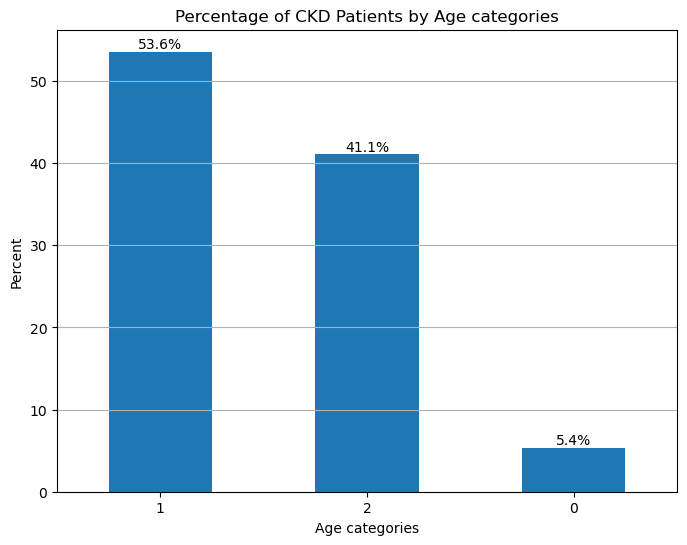

In [20]:
EventCKD35_1 = data[data['EventCKD35'] == 1]
age_categories_counts = EventCKD35_1['Age.3.categories'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = age_categories_counts.plot(kind='bar')
plt.title('Percentage of CKD Patients by Age categories')
plt.xlabel('Age categories')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{v:.1f}%' for v in age_categories_counts], color='black')

plt.show()

### History

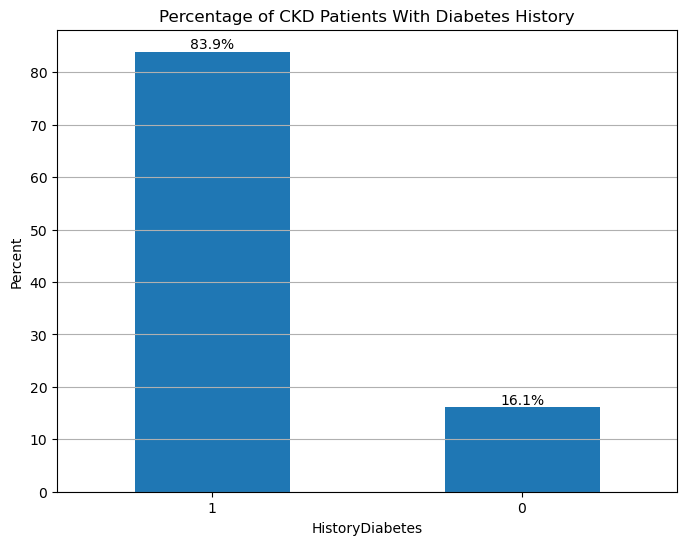

In [21]:
EventCKD35_1 = data[data['EventCKD35'] == 1]
HistoryDiabetes_counts = EventCKD35_1['HistoryDiabetes'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = HistoryDiabetes_counts.plot(kind='bar')
plt.title('Percentage of CKD Patients With Diabetes History')
plt.xlabel('HistoryDiabetes')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{v:.1f}%' for v in HistoryDiabetes_counts], color='black')

plt.show()

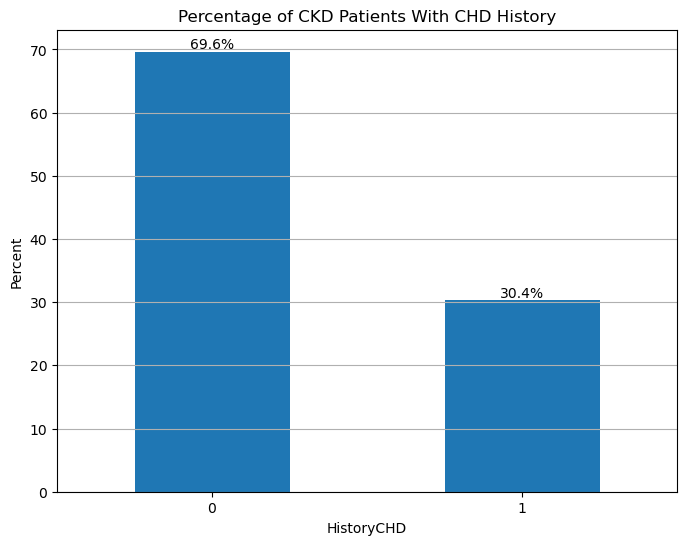

In [22]:
EventCKD35_1 = data[data['EventCKD35'] == 1]
HistoryCHD_counts = EventCKD35_1['HistoryCHD'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = HistoryCHD_counts.plot(kind='bar')
plt.title('Percentage of CKD Patients With CHD History')
plt.xlabel('HistoryCHD')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{v:.1f}%' for v in HistoryCHD_counts], color='black')

plt.show()

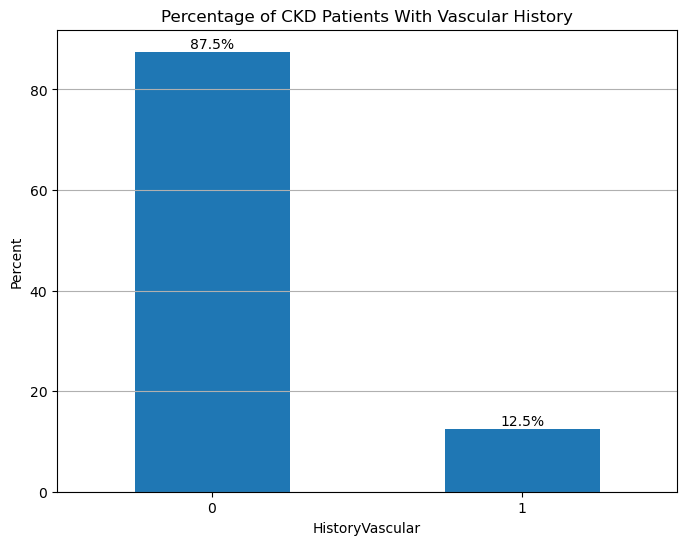

In [23]:
EventCKD35_1 = data[data['EventCKD35'] == 1]
HistoryVascular_counts = EventCKD35_1['HistoryVascular'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = HistoryVascular_counts.plot(kind='bar')
plt.title('Percentage of CKD Patients With Vascular History')
plt.xlabel('HistoryVascular')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{v:.1f}%' for v in HistoryVascular_counts], color='black')

plt.show()

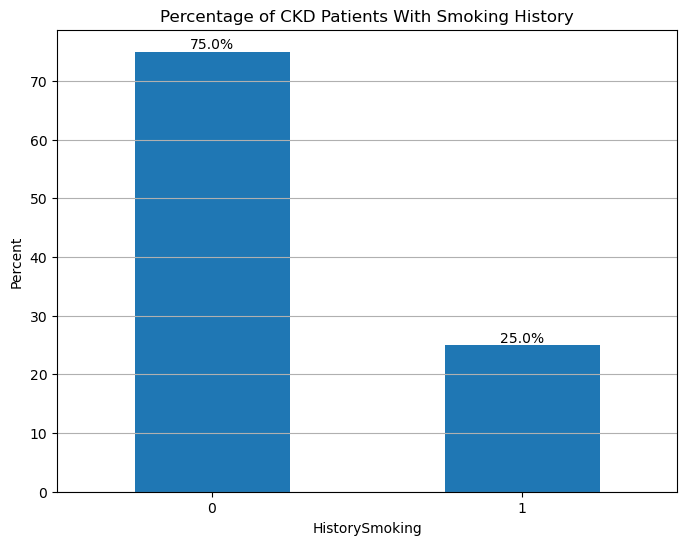

In [24]:
EventCKD35_1 = data[data['EventCKD35'] == 1]
HistorySmoking_counts = EventCKD35_1['HistorySmoking'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = HistorySmoking_counts.plot(kind='bar')
plt.title('Percentage of CKD Patients With Smoking History')
plt.xlabel('HistorySmoking')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{v:.1f}%' for v in HistorySmoking_counts], color='black')

plt.show()

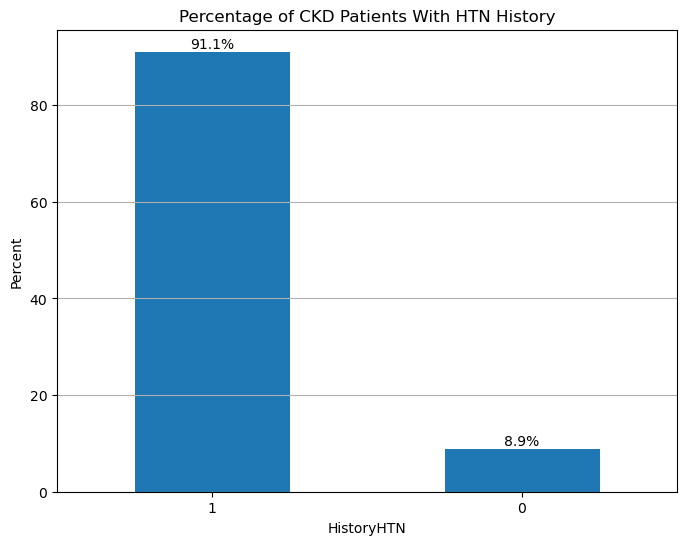

In [25]:
EventCKD35_1 = data[data['EventCKD35'] == 1]
HistoryHTN_counts = EventCKD35_1['HistoryHTN '].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = HistoryHTN_counts.plot(kind='bar')
plt.title('Percentage of CKD Patients With HTN History')
plt.xlabel('HistoryHTN')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{v:.1f}%' for v in HistoryHTN_counts], color='black')

plt.show()

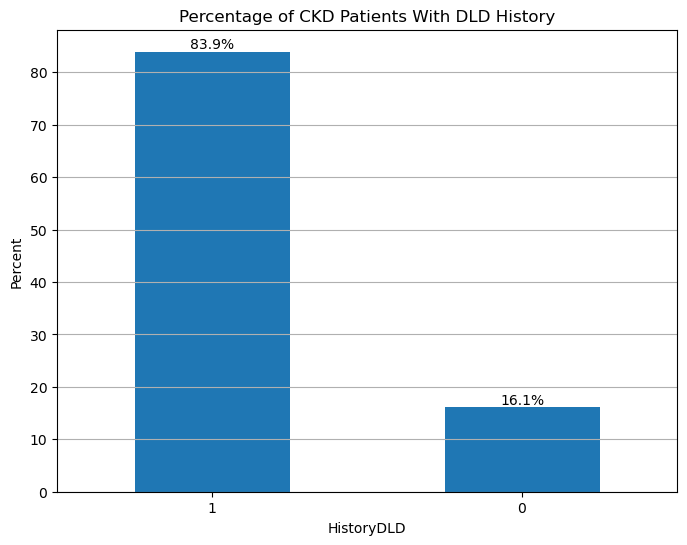

In [26]:
EventCKD35_1 = data[data['EventCKD35'] == 1]
HistoryDLD_counts = EventCKD35_1['HistoryDLD'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = HistoryDLD_counts.plot(kind='bar')
plt.title('Percentage of CKD Patients With DLD History')
plt.xlabel('HistoryDLD')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{v:.1f}%' for v in HistoryDLD_counts], color='black')

plt.show()

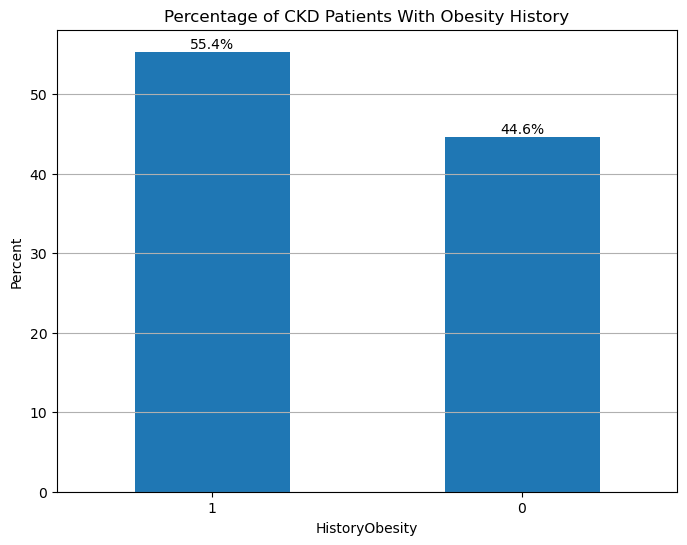

In [27]:
EventCKD35_1 = data[data['EventCKD35'] == 1]
HistoryObesity_counts = EventCKD35_1['HistoryObesity'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = HistoryObesity_counts.plot(kind='bar')
plt.title('Percentage of CKD Patients With Obesity History')
plt.xlabel('HistoryObesity')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{v:.1f}%' for v in HistoryObesity_counts], color='black')

plt.show()

### Meds

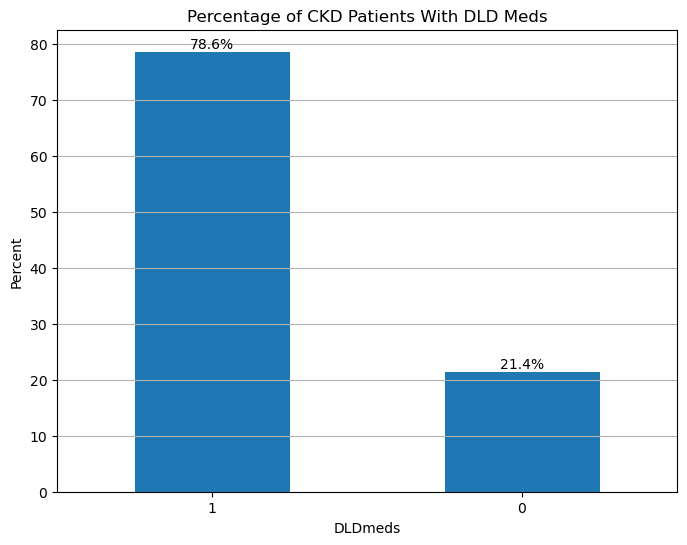

In [28]:
EventCKD35_1 = data[data['EventCKD35'] == 1]
DLDmeds_counts = EventCKD35_1['DLDmeds'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = DLDmeds_counts.plot(kind='bar')
plt.title('Percentage of CKD Patients With DLD Meds')
plt.xlabel('DLDmeds')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{v:.1f}%' for v in DLDmeds_counts], color='black')

plt.show()

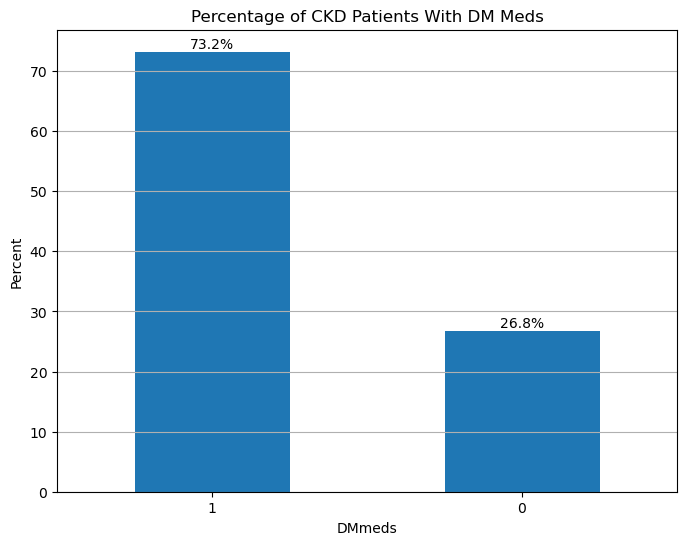

In [29]:
EventCKD35_1 = data[data['EventCKD35'] == 1]
DMmeds_counts = EventCKD35_1['DMmeds'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = DMmeds_counts.plot(kind='bar')
plt.title('Percentage of CKD Patients With DM Meds')
plt.xlabel('DMmeds')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{v:.1f}%' for v in DMmeds_counts], color='black')

plt.show()

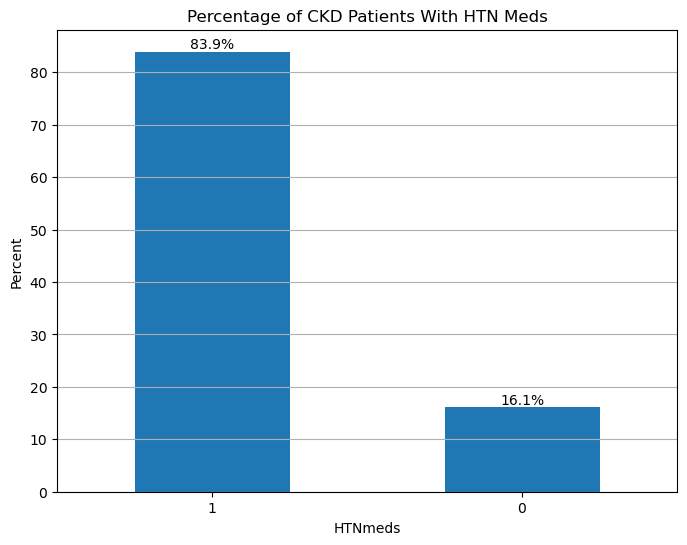

In [30]:
EventCKD35_1 = data[data['EventCKD35'] == 1]
HTNmeds_counts = EventCKD35_1['HTNmeds'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = HTNmeds_counts.plot(kind='bar')
plt.title('Percentage of CKD Patients With HTN Meds')
plt.xlabel('HTNmeds')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{v:.1f}%' for v in HTNmeds_counts], color='black')

plt.show()

### Test Results

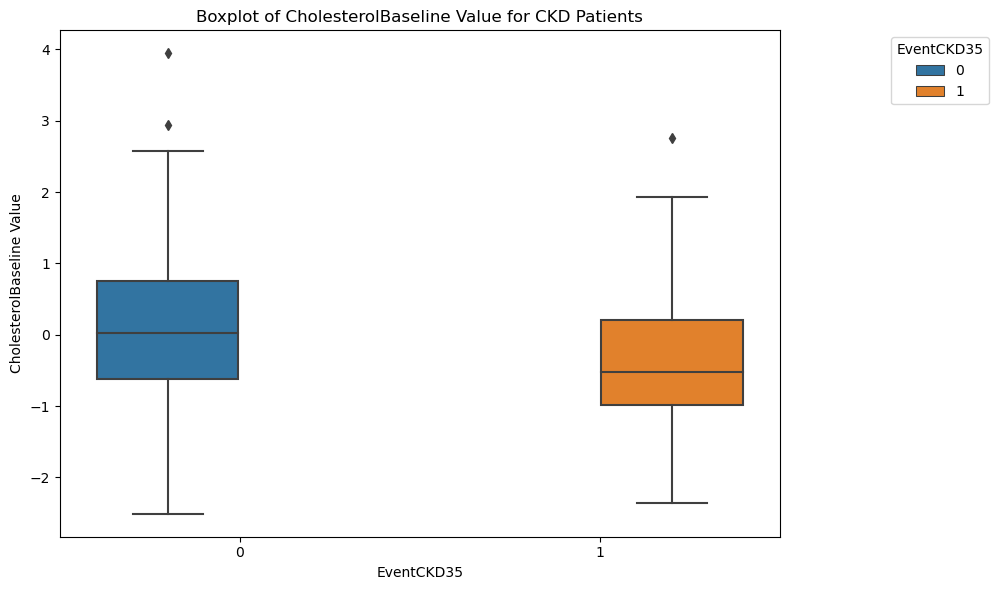

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['CholesterolBaseline','EventCKD35']], x='EventCKD35', y='CholesterolBaseline', hue='EventCKD35' )
plt.title('Boxplot of CholesterolBaseline Value for CKD Patients')
plt.xlabel('EventCKD35')
plt.ylabel('CholesterolBaseline Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='EventCKD35', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

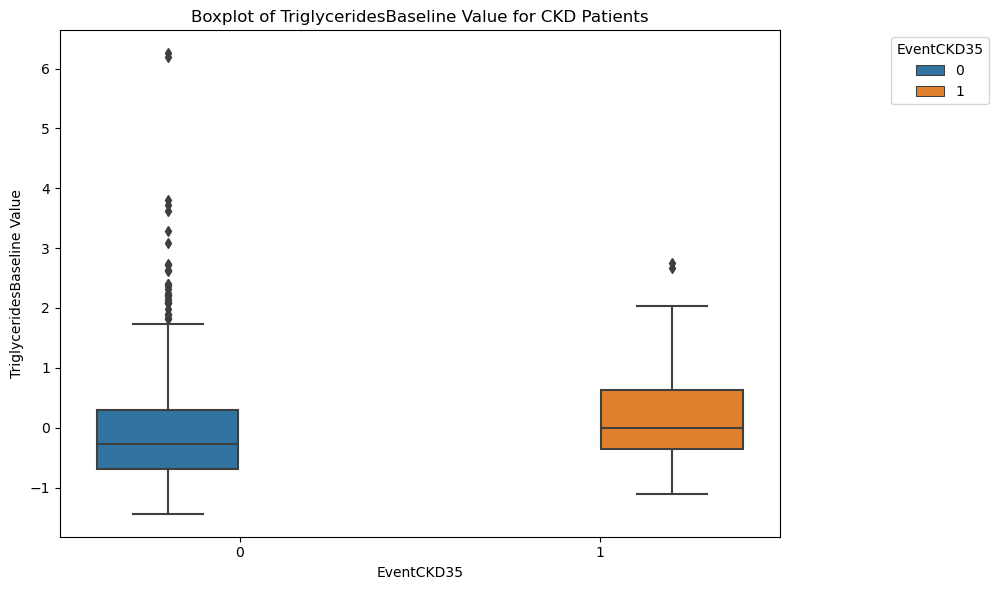

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['TriglyceridesBaseline','EventCKD35']], x='EventCKD35', y='TriglyceridesBaseline', hue='EventCKD35' )
plt.title('Boxplot of TriglyceridesBaseline Value for CKD Patients')
plt.xlabel('EventCKD35')
plt.ylabel('TriglyceridesBaseline Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='EventCKD35', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

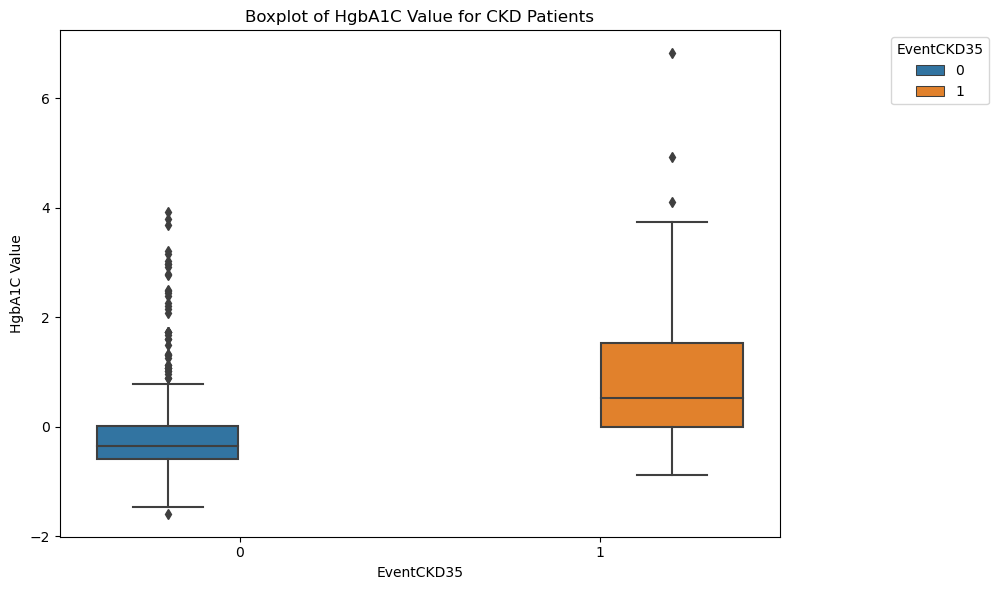

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['HgbA1C','EventCKD35']], x='EventCKD35', y='HgbA1C', hue='EventCKD35' )
plt.title('Boxplot of HgbA1C Value for CKD Patients')
plt.xlabel('EventCKD35')
plt.ylabel('HgbA1C Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='EventCKD35', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

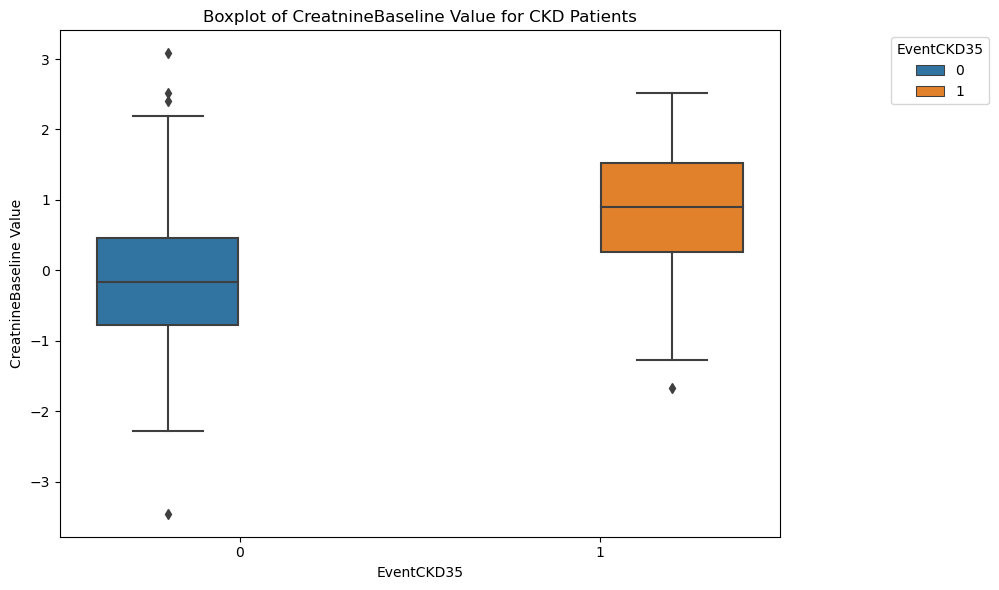

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['CreatnineBaseline','EventCKD35']], x='EventCKD35', y='CreatnineBaseline', hue='EventCKD35' )
plt.title('Boxplot of CreatnineBaseline Value for CKD Patients')
plt.xlabel('EventCKD35')
plt.ylabel('CreatnineBaseline Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='EventCKD35', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

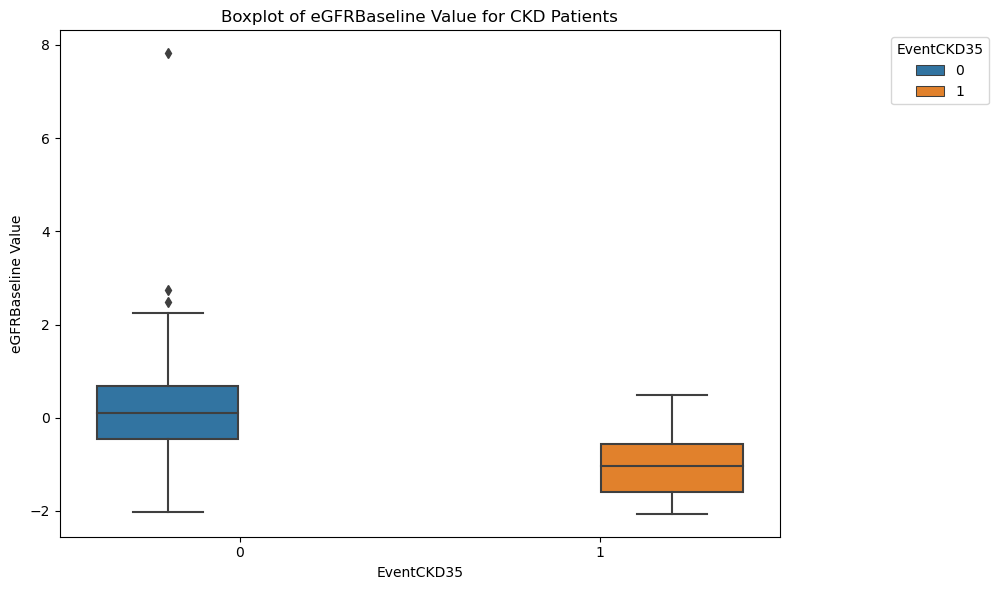

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['eGFRBaseline','EventCKD35']], x='EventCKD35', y='eGFRBaseline', hue='EventCKD35' )
plt.title('Boxplot of eGFRBaseline Value for CKD Patients')
plt.xlabel('EventCKD35')
plt.ylabel('eGFRBaseline Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='EventCKD35', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

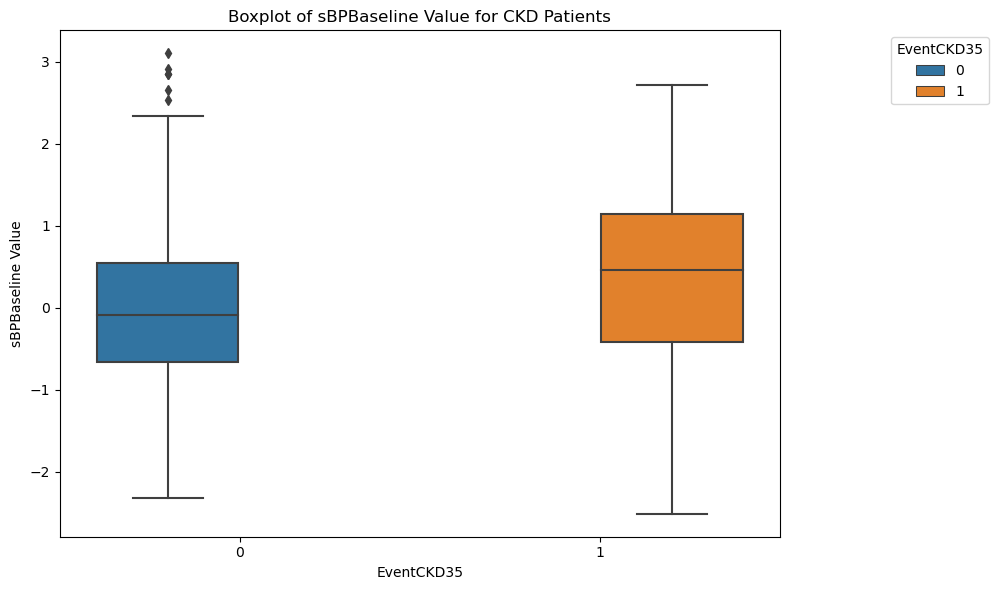

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['sBPBaseline','EventCKD35']], x='EventCKD35', y='sBPBaseline', hue='EventCKD35' )
plt.title('Boxplot of sBPBaseline Value for CKD Patients')
plt.xlabel('EventCKD35')
plt.ylabel('sBPBaseline Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='EventCKD35', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

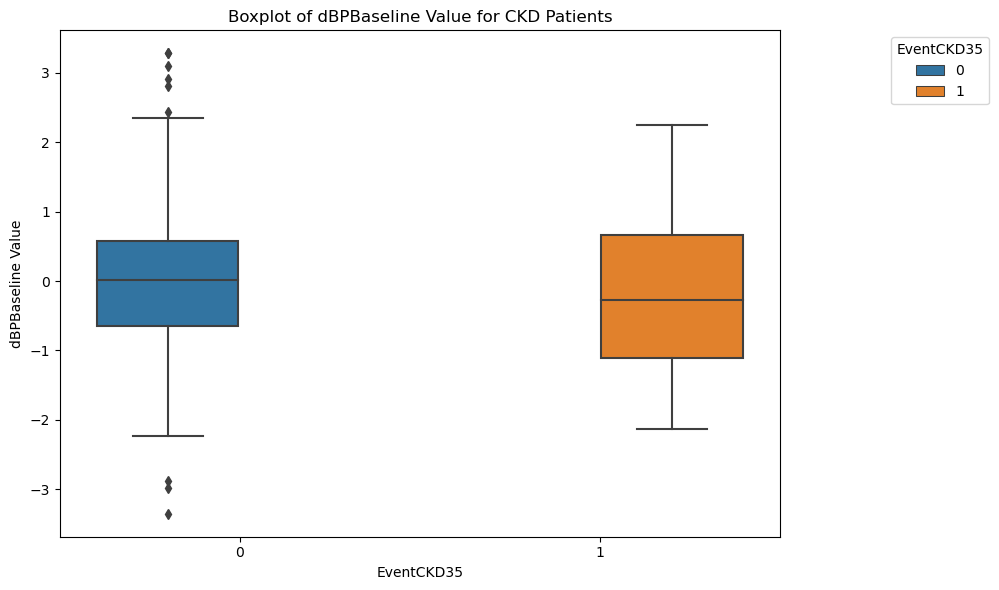

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['dBPBaseline','EventCKD35']], x='EventCKD35', y='dBPBaseline', hue='EventCKD35' )
plt.title('Boxplot of dBPBaseline Value for CKD Patients')
plt.xlabel('EventCKD35')
plt.ylabel('dBPBaseline Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='EventCKD35', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

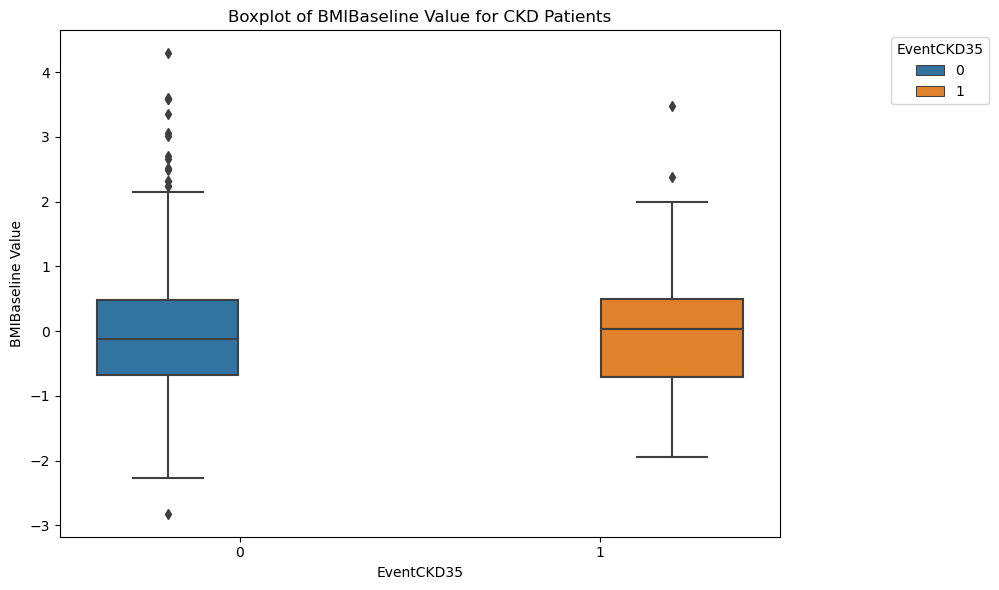

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['BMIBaseline','EventCKD35']], x='EventCKD35', y='BMIBaseline', hue='EventCKD35' )
plt.title('Boxplot of BMIBaseline Value for CKD Patients')
plt.xlabel('EventCKD35')
plt.ylabel('BMIBaseline Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='EventCKD35', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

### TimeToEventMonths

In [39]:
bins = [0, 30, 60, 90, float('inf')]
labels = [0, 1, 2,3]

data['Months_Range'] = pd.cut(data['TimeToEventMonths'], bins=bins, labels=labels, right=False)

In [40]:
Months_ranges = data.groupby('Months_Range')['TimeToEventMonths'].agg(['min', 'max'])

print(Months_ranges)

              min  max
Months_Range          
0               0   29
1              30   59
2              63   89
3              90  111


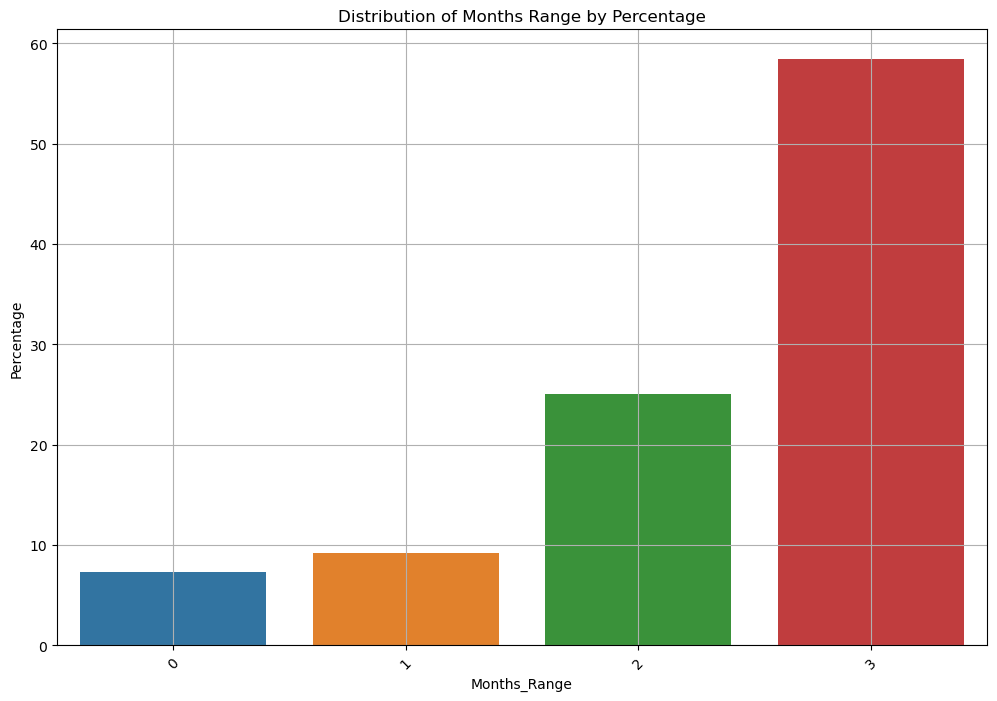

In [41]:
Months_Range_count = data['Months_Range'].value_counts().reset_index()
Months_Range_count.columns = ['Months_Range', 'count']


total_unique_subjects = Months_Range_count['count'].sum()

Months_Range_count['percentage'] = (Months_Range_count['count'] / total_unique_subjects) * 100

plt.figure(figsize=(12, 8))
sns.barplot(data=Months_Range_count, x='Months_Range', y='percentage')
plt.xlabel('Months_Range')
plt.ylabel('Percentage')
plt.title('Distribution of Months Range by Percentage')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

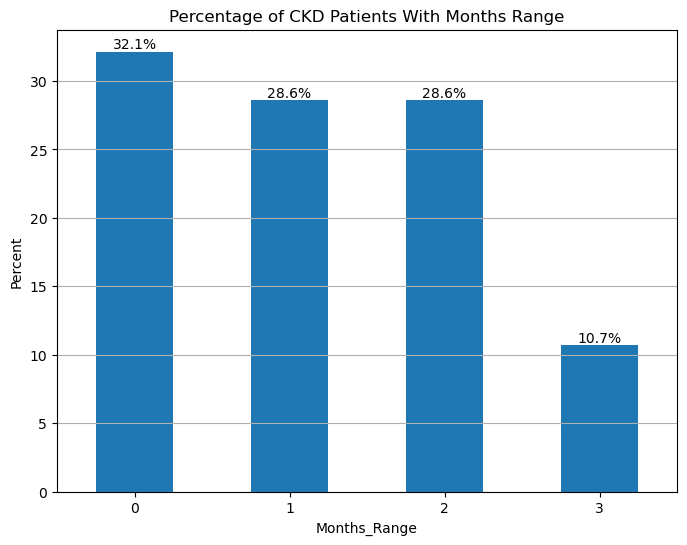

In [42]:
EventCKD35_1 = data[data['EventCKD35'] == 1]
Months_count = EventCKD35_1['Months_Range'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = Months_count.plot(kind='bar')
plt.title('Percentage of CKD Patients With Months Range')
plt.xlabel('Months_Range')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{v:.1f}%' for v in Months_count], color='black')

plt.show()

## Description

**Gender Distribution:**
- The data is distributed similarly to the population.

- 64.3% of CKD patients are Males.

- 35.7% of CKD patients are Female.

**Age Distribution:**
- We have less data regarding the population over the age of 65, there are only 22% of them in the data compared to data of over 35% for the other age groups.

- Over 53% of CKD patients are in the 50-64 age range, after that over 41% are over 65.

**Medical History:**

A considerable number of study participants have a history of diabetes, hypertension, dyslipidemia and obesity, which emphasizes the focus of the study on people at risk of chronic kidney disease and other related conditions.
- We found that over 83% of CKD patients have a history of the following diseases: Dieabetes, hypertension, dyslipidemia.

- We found that over 73% of CKD patients use Medss for the same diseases.

- In the following tests, we found abnormal values for CKD patients: HgbA1C, CreatnineBaseline, estimated golmerular filtration rate.

**High Variability in Blood Pressure and BMI:** 

There is considerable variability in systolic and diastolic blood pressure, as well as in BMI, indicating a diverse study population in terms of cardiovascular and metabolic health.

**Time To Event Months:**

- over 60% of the data are patients who experienced more than 90 months between the start of follow-up and the onset of CKD or until the last treatment.

- But when it comes to CKD patients, 32% of the outbreaks occurred after up to 29 months, 28% for both the 30-60 month group and the 60-90 month group, while the over 90 month group is the smallest with about 10%.





---
<p style="text-align:left;">
    <span style="font-family: Tahoma; font-weight: bold; font-size: 20px; color: black;">2. Feature Selection</span>
</p>

### Statistical Filtering Approache: SelectKBest
##### SelectKBest is a technique used for selecting the top k features based on univariate statistical tests.

**Advantages:**
- **Simple to Implement:** It's straightforward to use because it focuses on evaluating each feature individually against the target variable.

- **Scalability:** Works well even with large datasets because it evaluates each feature independently.

**Disadvantages:**
- **Ignores Feature Dependencies:** SelectKBest treats each feature independently and may miss important relationships between features.

- **Limited Scope:** It may not perform well when feature interactions are crucial for predictive modeling.

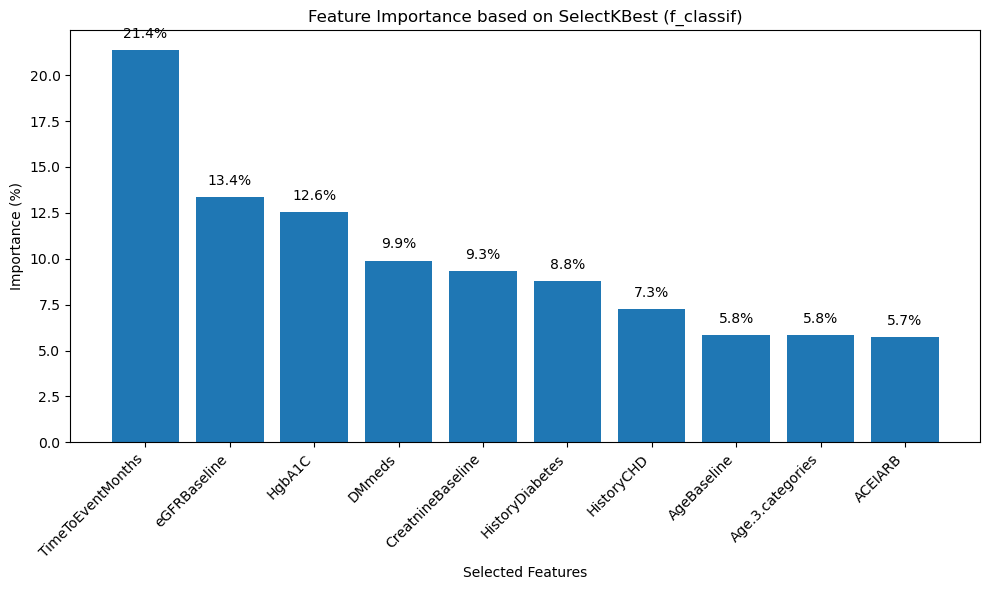

Selected Features:


,Feature,Importance (%)
0,TimeToEventMonths,21.374393
1,eGFRBaseline,13.375096
2,HgbA1C,12.557559
3,DMmeds,9.902019
4,CreatnineBaseline,9.343301
5,HistoryDiabetes,8.765330
6,HistoryCHD,7.275006
7,AgeBaseline,5.841326
8,Age.3.categories,5.831832
9,ACEIARB,5.734138


In [43]:
data_features = data.drop(columns=['EventCKD35', 'StudyID','Months_Range'])
data_target = data['EventCKD35']

selector = SelectKBest(score_func=f_classif, k=10)

selected_data = selector.fit_transform(data_features, data_target)

selected_indices = selector.get_support(indices=True)

selected_features = data_features.columns[selected_indices]

scores = -np.log10(selector.pvalues_)

sorted_indices = np.argsort(scores[selected_indices])[::-1]

sorted_scores = scores[selected_indices][sorted_indices]
sorted_features = selected_features[sorted_indices]

total_score = np.sum(scores[selected_indices])
percentages = (sorted_scores / total_score) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(sorted_features)), percentages, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
plt.xlabel('Selected Features')
plt.ylabel('Importance (%)')
plt.title('Feature Importance based on SelectKBest (f_classif)')

for bar, percentage, feature_name in zip(bars, percentages, sorted_features):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Selected Features:")
selected_features_df = pd.DataFrame({'Feature': sorted_features, 'Importance (%)': percentages})
selected_features_df

In [44]:
Feature_Selection_SelectKBest_Data = data[['TimeToEventMonths','eGFRBaseline','HgbA1C',
                                           'DMmeds','CreatnineBaseline','HistoryDiabetes','HistoryCHD',
                                           'AgeBaseline','Age.3.categories','ACEIARB','EventCKD35']]

#### Why why we chose This Data Selection Technique?
##### We chose this data selection technique because we want a quick way to rank features based on statistical tests and also because the relationship between individual features and the target is what matters most.
___

### Dimensionality Reduction Methods: Correlation Feature Selection
##### Correlation Feature Selection involves selecting features based on their correlation coefficients with the target variable.

**Advantages:**
- **Captures Relationships:** Takes into account the pairwise relationships between features and the target variable.
- **Simplicity:** Easy to understand and implement.

**Disadvantages:**
- **Assumes Linearity:** Works best when the relationship between features and the target is linear; may not capture complex, non-linear relationships effectively.
- **Sensitive to Outliers:** Correlation measures can be influenced by outliers, which might distort the importance of features.

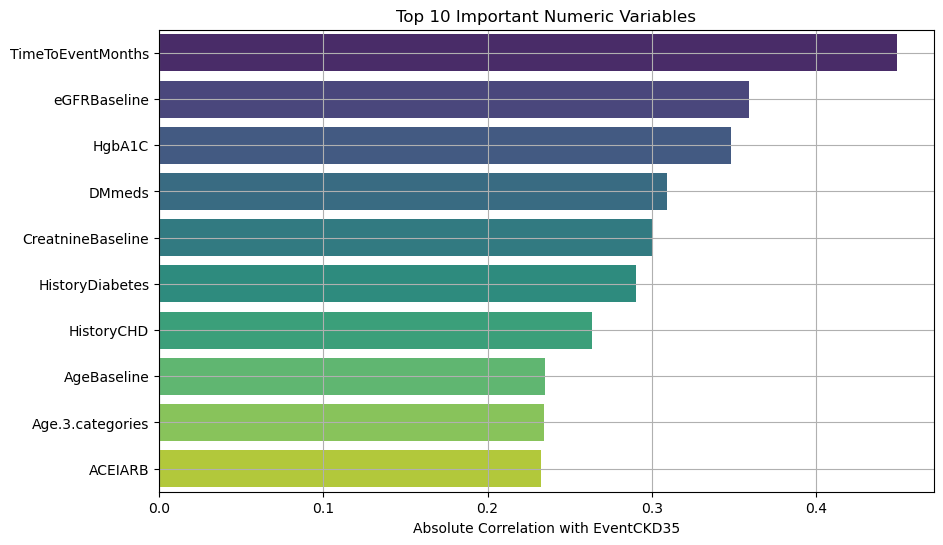

,EventCKD35
TimeToEventMonths,0.449169
eGFRBaseline,0.359060
HgbA1C,0.348058
DMmeds,0.308959
CreatnineBaseline,0.299953
HistoryDiabetes,0.290294
HistoryCHD,0.263532
AgeBaseline,0.234616
Age.3.categories,0.234412
ACEIARB,0.232300


In [45]:
numeric_cols = ['Gender', 'AgeBaseline', 'Age.3.categories',
       'HistoryDiabetes', 'HistoryCHD', 'HistoryVascular', 'HistorySmoking',
       'HistoryHTN ', 'HistoryDLD', 'HistoryObesity', 'DLDmeds', 'DMmeds',
       'HTNmeds', 'ACEIARB', 'CholesterolBaseline', 'TriglyceridesBaseline',
       'HgbA1C', 'CreatnineBaseline', 'eGFRBaseline', 'sBPBaseline',
       'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths']
data_target = 'EventCKD35'

correlations = data[numeric_cols + [data_target]].corr()[data_target].drop(data_target)

selected_features_CFS = correlations.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=selected_features_CFS.values, y=selected_features_CFS.index, orient='h', palette='viridis')
plt.xlabel('Absolute Correlation with ' + data_target)
plt.title('Top 10 Important Numeric Variables')
plt.grid(True)
plt.show()

selected_features_CFS = pd.DataFrame(selected_features_CFS)
selected_features_CFS

In [46]:
Feature_Selection_Correlation_Data = data[['TimeToEventMonths','eGFRBaseline','HgbA1C',
                                           'DMmeds','CreatnineBaseline','HistoryDiabetes','HistoryCHD',
                                           'AgeBaseline','Age.3.categories','ACEIARB','EventCKD35']]


#### Why why we chose This Data Selection Technique?
##### We chose this data selection technique because we suspect that feature interactions (relationships between features) are important, and also because we expect a more direct linear relationship between features and the target.

#### In our feature selection we got the same 10 most important features in both methoods we checked

---

<p style="text-align:left;">
    <span style="font-family: Tahoma; font-weight: bold; font-size: 20px; color: black;">3. Class Imbalance</span>
</p>

count    491.000000
mean       0.114053
std        0.318200
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: EventCKD35, dtype: float64
0    435
1     56
Name: EventCKD35, dtype: int64


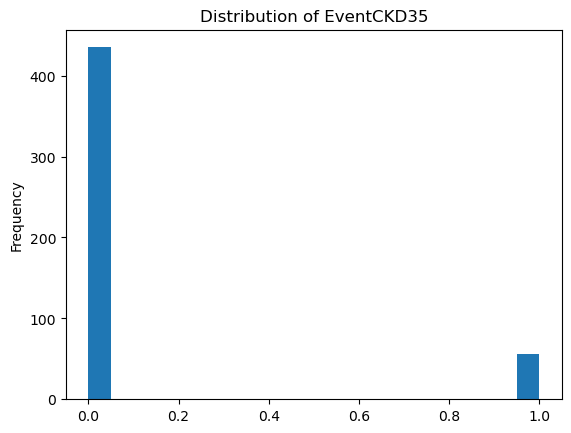

0    435
1     56
Name: EventCKD35, dtype: int64


In [47]:
target_variable = 'EventCKD35'

print(data[target_variable].describe())

print(data[target_variable].value_counts())

if data[target_variable].dtype == 'object':  # Categorical variable
    data[target_variable].value_counts().plot(kind='bar')
    plt.title('Distribution of ' + target_variable)
    plt.show()
else:
    data[target_variable].plot(kind='hist', bins=20)
    plt.title('Distribution of ' + target_variable)
    plt.show()

if data[target_variable].nunique() == 2:
    print(data[target_variable].value_counts())

### Objective Variable Distribution Analysis

**Understanding the target variable:**

Understanding that the target variable "EventCKD35" displays a binary result of 0 or 1

**Statistical data calculation:**

- count
- mean
- standard deviation
- minimum value
- maximum value 
- quartile
- median
- three quartiles
- category frequency

**Graph:** 

Display the snapshot in the form of a histogram to see the frequency distribution of each category.

**Imbalance test:** 

it can be seen that there is an imbalance because category 0 prevails over category 1.

In [48]:
features = ["TimeToEventMonths", "eGFRBaseline", "HgbA1C", "DMmeds", "CreatnineBaseline",
            "HistoryDiabetes", "HistoryCHD", "AgeBaseline", "Age.3.categories", "ACEIARB"]
target = "EventCKD35"

0    56
1    56
Name: EventCKD35, dtype: int64


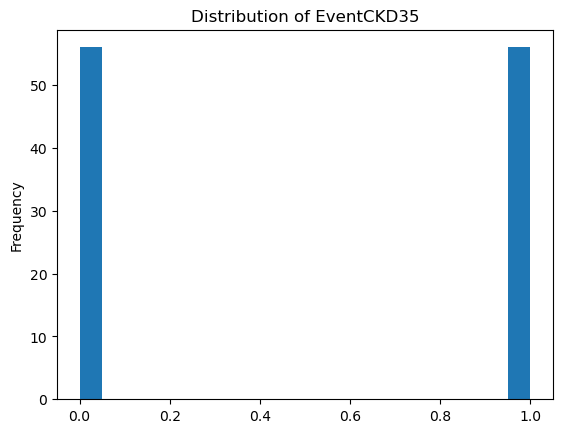

In [49]:
X_train = data[features]
y_train = data[target]

y_train = y_train.squeeze()

rus = RandomUnderSampler(random_state=42)

X_train_resampled_rus, y_train_resampled_rus = rus.fit_resample(X_train, y_train)

X_train_resampled_rus = pd.DataFrame(X_train_resampled_rus, columns=X_train.columns)
y_train_resampled_rus = pd.Series(y_train_resampled_rus)

balanced_data_RandomUnderSample = X_train_resampled_rus.copy()
balanced_data_RandomUnderSample['target'] = y_train_resampled_rus

print(pd.Series(y_train_resampled_rus).value_counts())

target_variable = "EventCKD35"

if y_train_resampled_rus.dtype == 'object':
    y_train_resampled_rus.value_counts().plot(kind='bar')
    plt.title('Distribution of ' + target_variable)
    plt.show()
else:
    y_train_resampled_rus.plot(kind='hist', bins=20)
    plt.title('Distribution of ' + target_variable)
    plt.show()

### Random Under-Sampling
**Explanation and justification:**

Random subsampling involves randomly removing samples from the majority class in this case, "EventCKD35 = 0", to balance the data set. This technique can help reduce the risk of overfitting in the majority class and can be effective when you have a large data set.

This technique was chosen to balance the dataset by reducing the number of majority class instances, potentially improving the model's ability to generalize and perform well on the minority class.

0    435
1    435
Name: EventCKD35, dtype: int64


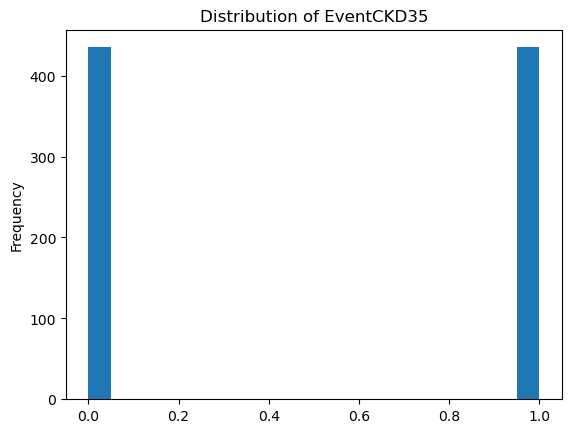

In [50]:
y_train = data[target]

y_train = y_train.squeeze()

smote = SMOTE(random_state=42)

X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)

X_train_resampled_smote = pd.DataFrame(X_train_resampled_smote, columns=X_train.columns)
y_train_resampled_smote = pd.Series(y_train_resampled_smote)

balanced_data_smote = X_train_resampled_smote.copy()
balanced_data_smote['target'] = y_train_resampled_smote

print(pd.Series(y_train_resampled_smote).value_counts())

target_variable = "EventCKD35"

if y_train_resampled_smote.dtype == 'object':
    y_train_resampled_smote.value_counts().plot(kind='bar')
    plt.title('Distribution of ' + target_variable)
    plt.show()
else:
    y_train_resampled_smote.plot(kind='hist', bins=20)
    plt.title('Distribution of ' + target_variable)
    plt.show()

balanced_data_smote.to_csv('path_to_balanced_data_smote.csv', index=False)

### SMOTE 
**Explanation and Justification:**

SMOTE generates synthetic examples for the minority class "EventCKD35 = 1" by interpolating between existing examples. This technique helps to increase the representation of the minority class without duplication, potentially improving the model's ability to generalize.

SMOTE was chosen to generate synthetic examples for the minority class, thereby increasing its representation in the dataset and potentially improving the classifier's ability to learn from the minority class instances.

---
<p style="text-align:left;">
    <span style="font-family: Tahoma; font-weight: bold; font-size: 20px; color: black;">4. Model Training and Evaluation</span>
</p>

### Define Classification Models
**We will train the following four classification models:**
- Logistic Regression
- Random Forest Classifier
- Support Vector Classifier (SVC)
- Gradient Boosting Classifier

**In order to choose the best data, we will examine this 4 models on four different types of data:**
- Basic data
- Data with feature selection
- Data with feature selection and Random Under-Sampling class imbalance method
- Data with feature selection and Smote class imbalance method

**Evaluation Metrics and Cross-Validation**

We will evaluate the models using cross-validation to ensure stability and reliability of the results. We will compute metrics such as ROC AUC, F1 score, recall, and precision.

#### Basic data

In [51]:
features = ['StudyID','Gender','HistoryVascular','HistorySmoking','HistoryHTN ','HistoryDLD','HistoryObesity','HTNmeds','CholesterolBaseline','TriglyceridesBaseline','sBPBaseline','dBPBaseline','BMIBaseline',"TimeToEventMonths", "eGFRBaseline", "HgbA1C", "DMmeds", "CreatnineBaseline",
            "HistoryDiabetes", "HistoryCHD", "AgeBaseline", "Age.3.categories", "ACEIARB"]
target = "EventCKD35"

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision'
}

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)}


results = {}

for model_name, model in models.items():
    cv_results = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=scoring)
    
    results[model_name] = {
        'roc_auc': np.mean(cv_results['test_roc_auc']),
        'f1': np.mean(cv_results['test_f1']),
        'recall': np.mean(cv_results['test_recall']),
        'precision': np.mean(cv_results['test_precision'])
    }

results_df = pd.DataFrame(results).T

print("\nCross-Validation Results:")
print(results_df)

best_model_name = results_df['roc_auc'].idxmax()
best_model = models[best_model_name]

best_model.fit(X_train_scaled, y_train)

y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n ROC AUC for Best Model ({best_model_name})")


Cross-Validation Results:
                      roc_auc        f1    recall  precision
Logistic Regression  0.905374  0.390977  0.355556   0.448571
Random Forest        0.893513  0.203963  0.133333   0.466667
SVC                  0.902172  0.298368  0.200000   0.616667
Gradient Boosting    0.879052  0.413835  0.355556   0.520000

 ROC AUC for Best Model (Logistic Regression)


Cross validation results give an average value after performing 5 times.


Classification Report for Best Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        88
           1       1.00      0.45      0.62        11

    accuracy                           0.94        99
   macro avg       0.97      0.73      0.80        99
weighted avg       0.94      0.94      0.93        99



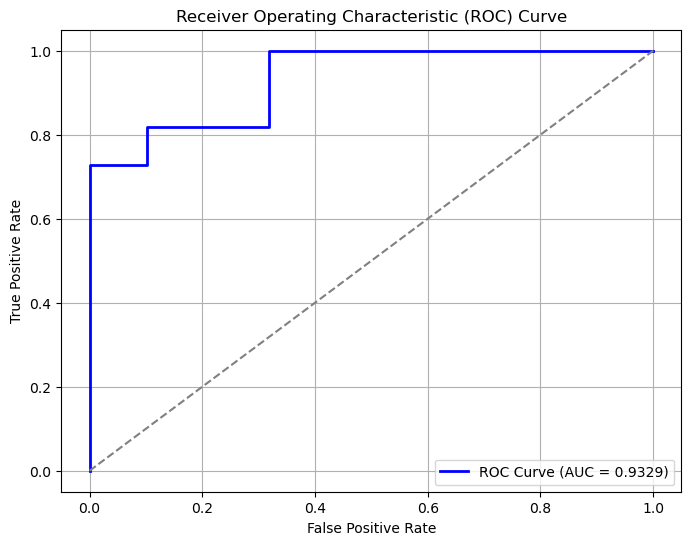

In [53]:
y_pred = best_model.predict(X_test_scaled)
print(f"\nClassification Report for Best Model ({best_model_name}):")
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

After obtaining the model with the best average performance, we apply it separately to the data and therefore get slightly different performances

#### Data with feature selection

In [54]:
features = ["TimeToEventMonths", "eGFRBaseline", "HgbA1C", "DMmeds", "CreatnineBaseline",
            "HistoryDiabetes", "HistoryCHD", "AgeBaseline", "Age.3.categories", "ACEIARB"]
target = "EventCKD35"

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision'
}

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)}


results = {}

for model_name, model in models.items():
    cv_results = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=scoring)
    
    results[model_name] = {
        'roc_auc': np.mean(cv_results['test_roc_auc']),
        'f1': np.mean(cv_results['test_f1']),
        'recall': np.mean(cv_results['test_recall']),
        'precision': np.mean(cv_results['test_precision'])
    }

results_df = pd.DataFrame(results).T

print("\nCross-Validation Results:")
print(results_df)

best_model_name = results_df['roc_auc'].idxmax()
best_model = models[best_model_name]

best_model.fit(X_train_scaled, y_train)

y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n ROC AUC for Best Model ({best_model_name})")


Cross-Validation Results:
                      roc_auc        f1    recall  precision
Logistic Regression  0.914134  0.545238  0.444444   0.739048
Random Forest        0.875033  0.382784  0.311111   0.525238
SVC                  0.814465  0.297143  0.200000   0.680000
Gradient Boosting    0.866655  0.380556  0.355556   0.412698

 ROC AUC for Best Model (Logistic Regression)


Cross validation results give an average value after performing 5 times.


Classification Report for Best Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        88
           1       1.00      0.55      0.71        11

    accuracy                           0.95        99
   macro avg       0.97      0.77      0.84        99
weighted avg       0.95      0.95      0.94        99



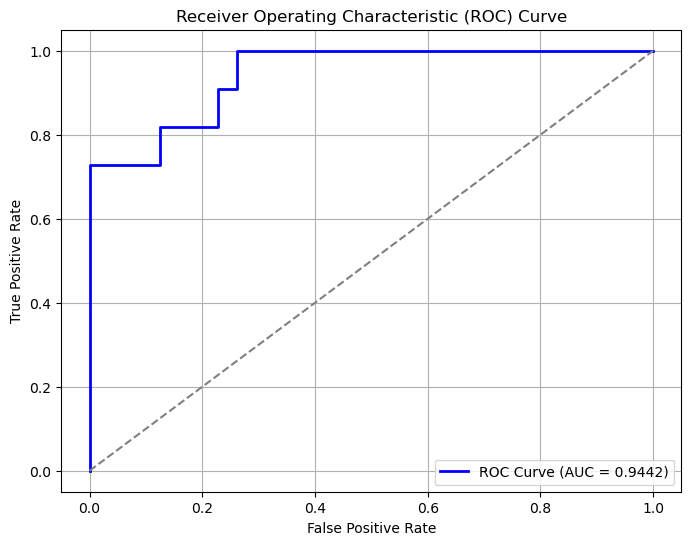

In [56]:
y_pred = best_model.predict(X_test_scaled)
print(f"\nClassification Report for Best Model ({best_model_name}):")
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

After obtaining the model with the best average performance, we apply it separately to the data and therefore get slightly different performances

#### Data with feature selection and Random Under-Sampling class imbalance method

In [57]:
features = ["TimeToEventMonths", "eGFRBaseline", "HgbA1C", "DMmeds", "CreatnineBaseline",
            "HistoryDiabetes", "HistoryCHD", "AgeBaseline", "Age.3.categories", "ACEIARB"]
target = "target"

X = balanced_data_RandomUnderSample[features]
y = balanced_data_RandomUnderSample[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision'
}

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)}

results = {}

for model_name, model in models.items():
    cv_results = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=scoring)
    
    results[model_name] = {
        'roc_auc': np.mean(cv_results['test_roc_auc']),
        'f1': np.mean(cv_results['test_f1']),
        'recall': np.mean(cv_results['test_recall']),
        'precision': np.mean(cv_results['test_precision'])
    }

results_df = pd.DataFrame(results).T

print("\nCross-Validation Results:")
print(results_df)

best_model_name = results_df['roc_auc'].idxmax()
best_model = models[best_model_name]

best_model.fit(X_train_scaled, y_train)

y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n ROC AUC for Best Model ({best_model_name})")


Cross-Validation Results:
                      roc_auc        f1    recall  precision
Logistic Regression  0.903086  0.817544  0.844444   0.793333
Random Forest        0.911265  0.864783  0.844444   0.895000
SVC                  0.843519  0.800261  0.844444   0.766919
Gradient Boosting    0.914198  0.781029  0.755556   0.814206

 ROC AUC for Best Model (Gradient Boosting)


Cross validation results give an average value after performing 5 times.


Classification Report for Best Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.80      0.73      0.76        11

    accuracy                           0.78        23
   macro avg       0.78      0.78      0.78        23
weighted avg       0.78      0.78      0.78        23



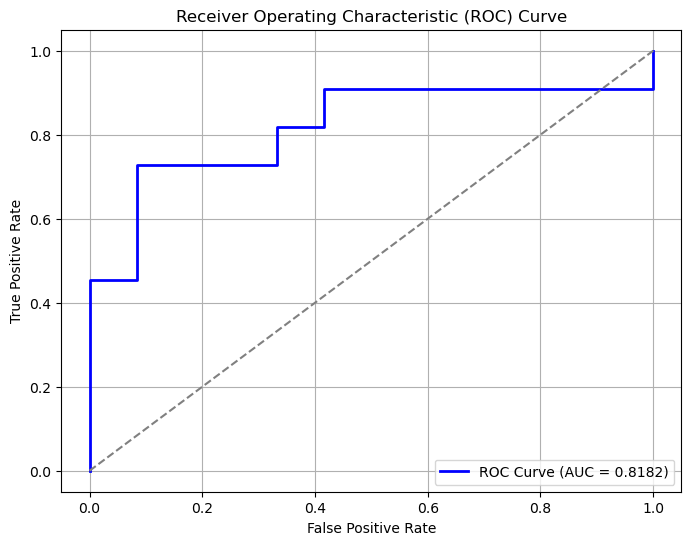

In [59]:
y_pred = best_model.predict(X_test_scaled)
print(f"\nClassification Report for Best Model ({best_model_name}):")
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

After obtaining the model with the best average performance, we apply it separately to the data and therefore get slightly different performances

#### Data with feature selection and Smote class imbalance method

In [60]:
features = ["TimeToEventMonths", "eGFRBaseline", "HgbA1C", "DMmeds", "CreatnineBaseline",
            "HistoryDiabetes", "HistoryCHD", "AgeBaseline", "Age.3.categories", "ACEIARB"]
target = "target"

X = balanced_data_smote[features]
y = balanced_data_smote[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision'
}

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)}


results = {}

for model_name, model in models.items():
    cv_results = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=scoring)
    
    results[model_name] = {
        'roc_auc': np.mean(cv_results['test_roc_auc']),
        'f1': np.mean(cv_results['test_f1']),
        'recall': np.mean(cv_results['test_recall']),
        'precision': np.mean(cv_results['test_precision'])
    }

results_df = pd.DataFrame(results).T

print("\nCross-Validation Results:")
print(results_df)

best_model_name = results_df['roc_auc'].idxmax()
best_model = models[best_model_name]

best_model.fit(X_train_scaled, y_train)

y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n ROC AUC for Best Model ({best_model_name})")


Cross-Validation Results:
                      roc_auc        f1    recall  precision
Logistic Regression  0.928670  0.839035  0.827453   0.852193
Random Forest        0.979295  0.929217  0.962650   0.899095
SVC                  0.961785  0.898235  0.913623   0.885333
Gradient Boosting    0.971072  0.916480  0.928157   0.905972

 ROC AUC for Best Model (Random Forest)


Cross validation results give an average value after performing 5 times.


Classification Report for Best Model (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        87
           1       0.91      0.99      0.95        87

    accuracy                           0.94       174
   macro avg       0.95      0.94      0.94       174
weighted avg       0.95      0.94      0.94       174



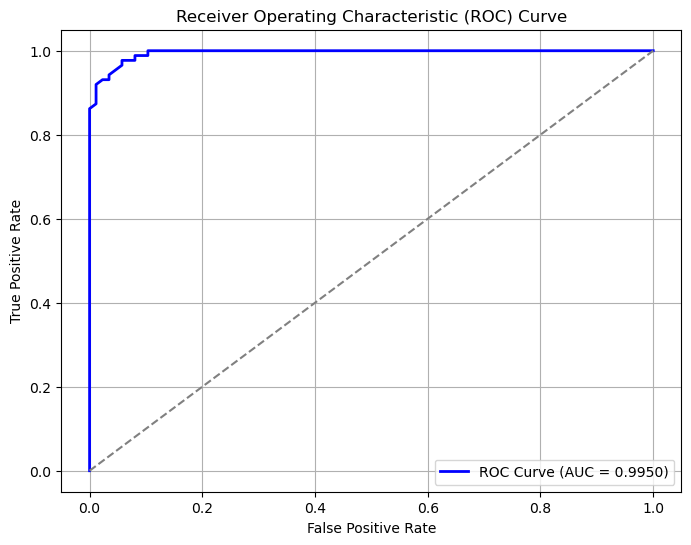

In [62]:
y_pred = best_model.predict(X_test_scaled)
print(f"\nClassification Report for Best Model ({best_model_name}):")
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

After obtaining the model with the best average performance, we apply it separately to the data and therefore get slightly different performances

### Data and model selection
We found that Data with feature selection and Smote class imbalance method has the best mean indicators in performing a random forest model.
But when training this model on the data, you get a score that is very close to 1: 0.995, which indicates that there is overfit in the model, probably because it is a small data.
After examining the roc_auc that is obtained after running the model a second time, we found that the data with feature selection only, and on which logistic regression is performed, has the best roc_auc index.

### Hyperparameter Optimization
Hyperparameter Optimization will be performed using GridSearchCV, which performs an exhaustive search over specified parameter values for each model.

In [63]:
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, None]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}
}

roc_auc_scores = {}
precision_recall_scores = {}

best_estimators = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_scaled if model_name == 'Logistic Regression' else X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for Logistic Regression: {'C': 10}
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Best parameters for SVC: {'C': 0.1, 'kernel': 'linear'}
Best parameters for Gradient Boosting: {'learning_rate': 1.0, 'n_estimators': 200}


### Compare Performance of Models
We will compare the models On the feature selection data based on ROC AUC scores, ROC curves, and Precision-Recall curves.

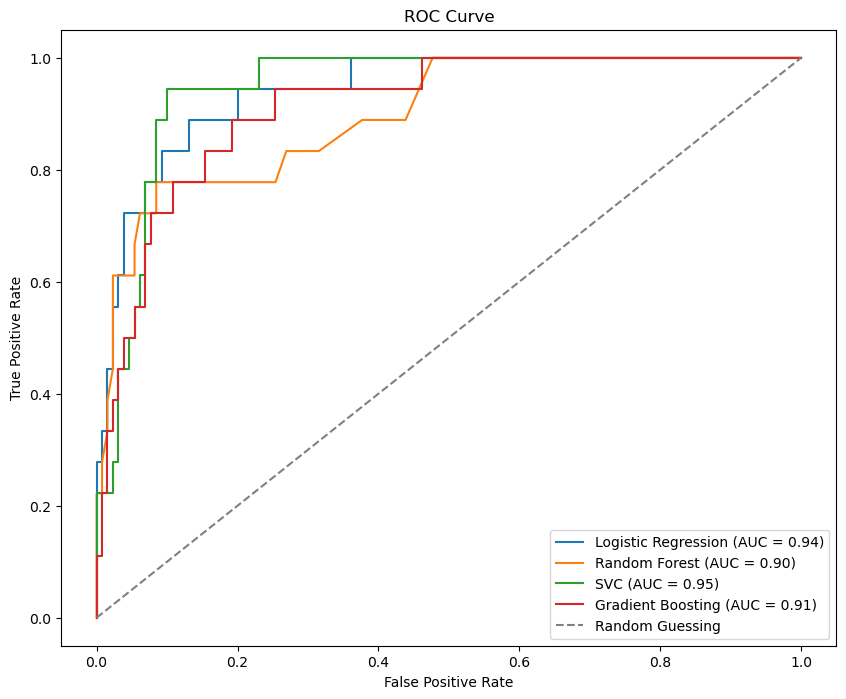

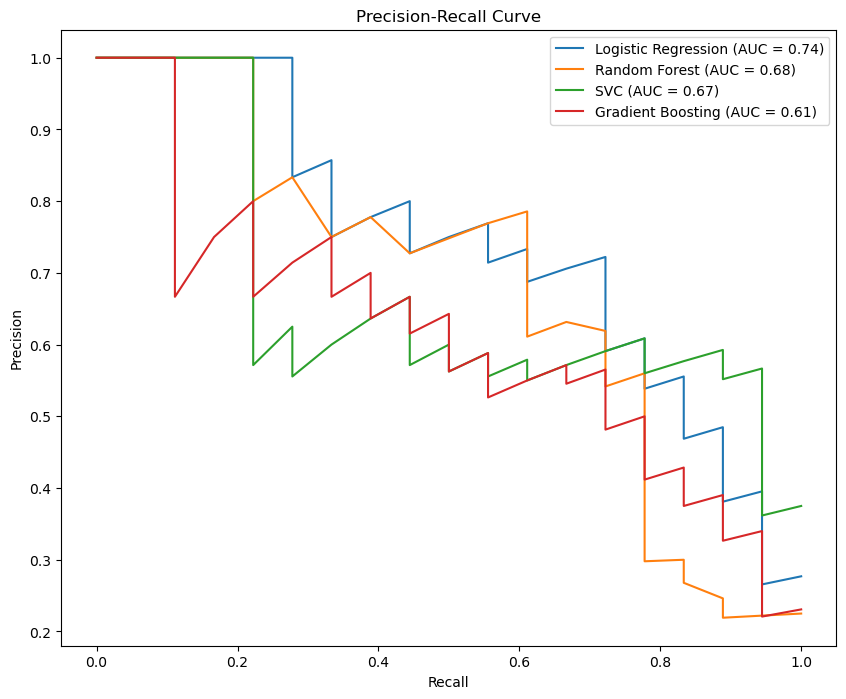

In [64]:
features = ["TimeToEventMonths", "eGFRBaseline", "HgbA1C", "DMmeds", "CreatnineBaseline",
            "HistoryDiabetes", "HistoryCHD", "AgeBaseline", "Age.3.categories", "ACEIARB"]
target = "EventCKD35"

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

best_estimators = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)}

roc_auc_scores = {}
precision_recall_scores = {}

for model_name, model in best_estimators.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[model_name] = roc_auc
    
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    precision_recall_scores[model_name] = (precision, recall, pr_auc)

plt.figure(figsize=(10, 8))
for model_name in best_estimators.keys():
    fpr, tpr, _ = roc_curve(y_test, best_estimators[model_name].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_scores[model_name]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
for model_name, (precision, recall, pr_auc) in precision_recall_scores.items():
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Model Selection Criteria
**Performance Index Choice:**
Based on the problem context (classification of CKD events), the ROC AUC score is a suitable primary metric. A high ROC AUC indicates that the model can effectively distinguish between positive and negative instances, which is crucial for predicting CKD events accurately.

**Considerations for Classification Error:**
The consequences of misclassifying CKD events (false positives and false negatives) should be evaluated based on domain-specific knowledge. For medical diagnoses like CKD, false negatives (missing an actual CKD event) might lead to delayed treatment, whereas false positives (incorrectly predicting CKD event) could lead to unnecessary medical interventions. The balance between these consequences should inform the choice of the classification model.

---
<p style="text-align:left;">
    <span style="font-family: Tahoma; font-weight: bold; font-size: 20px; color: black;">5. Explanatory AI</span>
</p>

### SHAP
SHAP feature importance represent the contribution of each feature to the prediction for a given instance.

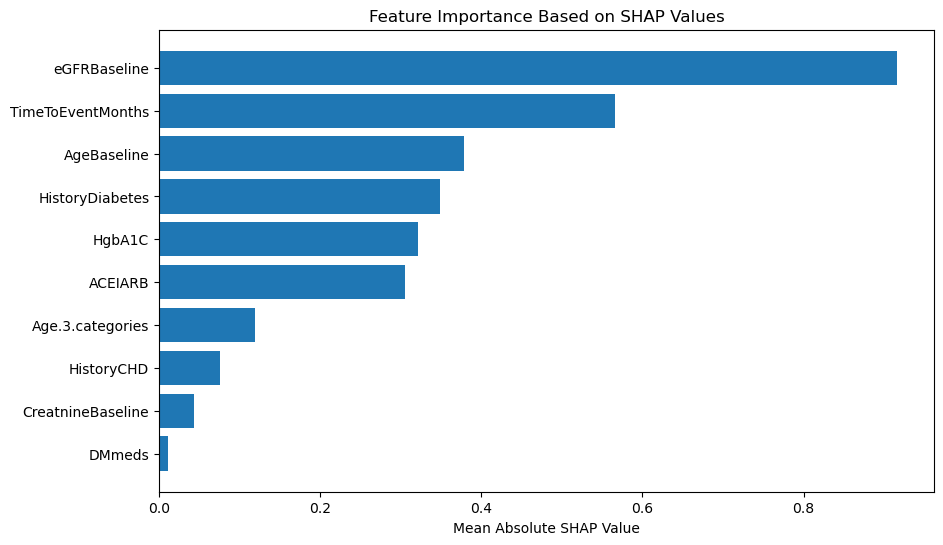

In [65]:
features = ["TimeToEventMonths", "eGFRBaseline", "HgbA1C", "DMmeds", "CreatnineBaseline",
            "HistoryDiabetes", "HistoryCHD", "AgeBaseline", "Age.3.categories", "ACEIARB"]
target = "EventCKD35"

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap_values_abs = np.abs(shap_values.values)
shap_values_mean = shap_values_abs.mean(axis=0)

feature_importance = pd.DataFrame(list(zip(X.columns, shap_values_mean)),
                                  columns=['Feature', 'SHAP Importance'])

feature_importance = feature_importance.sort_values(by='SHAP Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['SHAP Importance'])
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance Based on SHAP Values')
plt.gca().invert_yaxis()
plt.show()

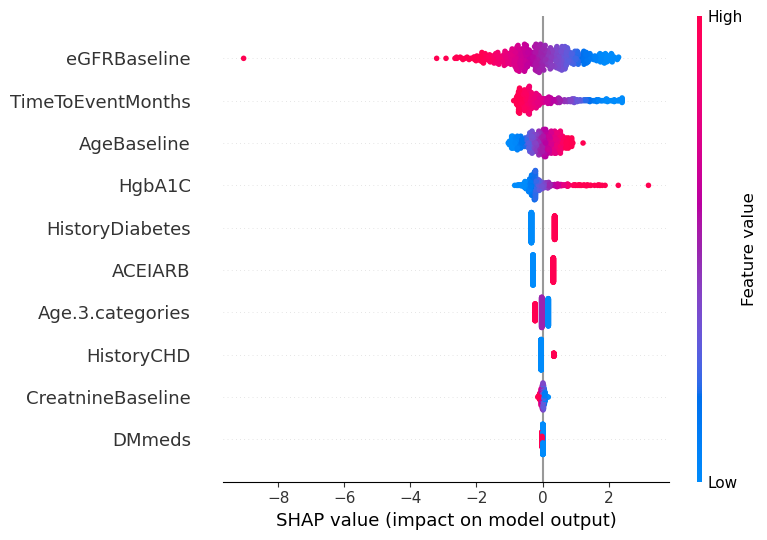

In [66]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)

#### Summary Plot: 
This plot shows the overall attribute importance and the impact of each occurrence in the dataset on Each feature, and how much the instance affects the classification.
* X-axis: SHAP value magnitude indicating the impact of each feature, And the distribution of all occurrence in the dataset to a certain feature along with their contribution
* Y-axis: Features, ordered by importance.
* Color: represents the value (red for positive contribution, blue for negative contribution)

---
<p style="text-align:left;">
    <span style="font-family: Tahoma; font-weight: bold; font-size: 20px; color: black;">6. Sub-Group Analysis</span>
</p>

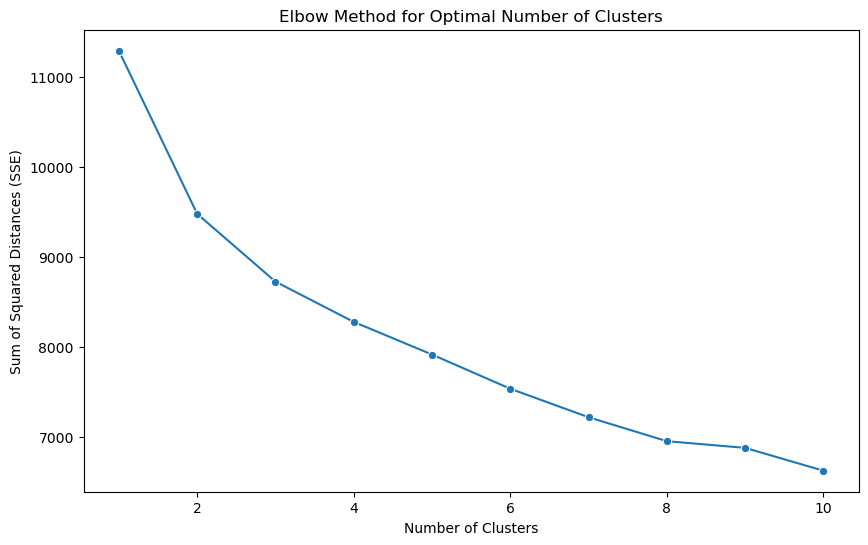

In [67]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_columns].drop(columns=['StudyID', 'EventCKD35'])

X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=k_range, y=sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

In [68]:
features = data[['TimeToEventMonths','eGFRBaseline','HgbA1C','DMmeds','CreatnineBaseline',
                 'HistoryDiabetes','HistoryCHD','AgeBaseline','Age.3.categories','ACEIARB']]

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

In [69]:
anova_results = {}
for feature in ['TimeToEventMonths','eGFRBaseline','HgbA1C','DMmeds','CreatnineBaseline','HistoryDiabetes','HistoryCHD','AgeBaseline','Age.3.categories','ACEIARB']:
    f_stat, p_value = stats.f_oneway(
        data[data['Cluster'] == 0][feature],
        data[data['Cluster'] == 1][feature],
        data[data['Cluster'] == 2][feature]
    )
    anova_results[feature] = {'F-statistic': f_stat, 'p-value': p_value}

anova_df = pd.DataFrame(anova_results).T
print(anova_df)

                   F-statistic        p-value
TimeToEventMonths   875.067852  4.000840e-162
eGFRBaseline         97.164507   3.019534e-36
HgbA1C               17.283436   5.595249e-08
DMmeds               15.780034   2.287229e-07
CreatnineBaseline    24.026046   1.116683e-10
HistoryDiabetes      16.755496   9.165383e-08
HistoryCHD            9.423029   9.653280e-05
AgeBaseline         288.260272   2.232796e-83
Age.3.categories    299.692074   1.250217e-85
ACEIARB              14.731283   6.137279e-07


**ANOVA Results Interpretation:**

If the p-value < 0.05, we reject the null hypothesis, indicating significant differences in means between clusters for that feature.

In our case we see that all the proposals of the cluster are rejected

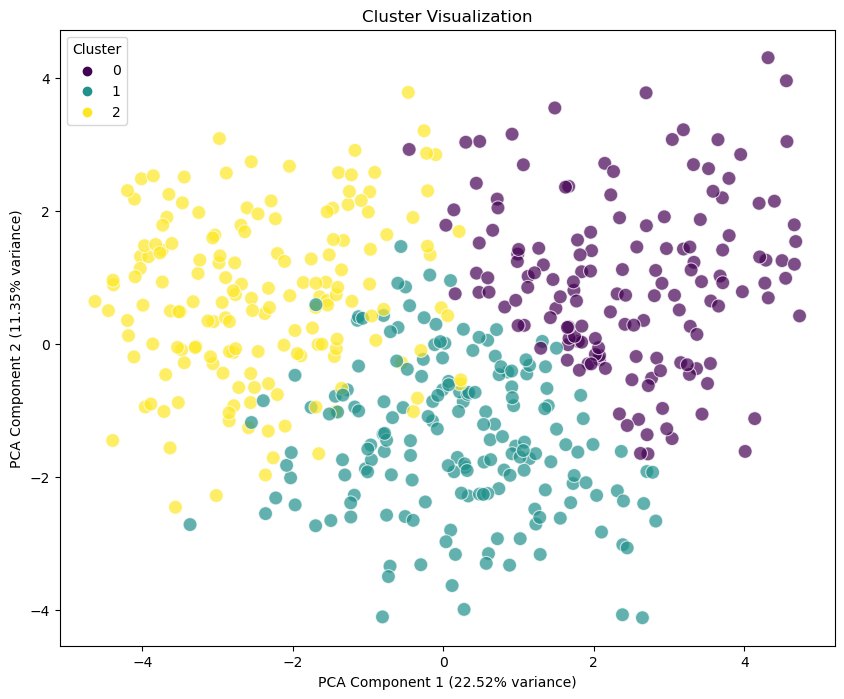

In [70]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Cluster Visualization')
plt.xlabel(f'PCA Component 1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'PCA Component 2 ({explained_variance[1]*100:.2f}% variance)')
plt.legend(title='Cluster')
plt.show()

In [71]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

average_distances = []
for i in range(optimal_clusters):
    cluster_points = X[y_kmeans == i]
    centroid = kmeans.cluster_centers_[i]
    avg_distance = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
    average_distances.append(avg_distance)
    print(f"Cluster {i}: Average Distance to Centroid = {avg_distance:.4f}")
    
most_unified_cluster = np.argmin(average_distances)
print(f"The most unified cluster is Cluster {most_unified_cluster} with average distance = {average_distances[most_unified_cluster]}")

Cluster 0: Average Distance to Centroid = 11.1129
Cluster 1: Average Distance to Centroid = 22.1254
Cluster 2: Average Distance to Centroid = 13.6720
The most unified cluster is Cluster 0 with average distance = 11.112872478974154


In [72]:
data_cluster_0 = data[data['cluster'] == 0]
data_cluster_0 = data_cluster_0.drop(columns=['StudyID', 'cluster'])
data_cluster_0 = data_cluster_0.reset_index(drop=True)

data_cluster_0.head()

,Gender,AgeBaseline,Age.3.categories,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,...,HgbA1C,CreatnineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,Months_Range,Cluster
0,0,63,1,1,0,0,0,1,1,1,...,0.520260,0.119728,-0.995085,0.039884,-1.296393,0.092196,105,0,3,0
1,1,71,2,0,0,0,0,1,1,0,...,-0.107696,1.516347,-1.567585,0.039884,-1.857129,-0.460126,96,0,3,0
2,1,68,2,1,0,0,0,1,1,0,...,0.010786,0.566646,-0.537409,0.358830,-0.081465,-1.180020,96,0,3,0
3,0,79,2,1,0,0,0,0,1,0,...,0.662439,-1.221026,-0.376793,-0.023905,0.292359,-1.728012,87,0,2,0
4,0,79,2,1,0,0,0,1,1,1,...,0.306992,-0.606514,-0.712691,0.932932,-0.268377,0.498139,81,1,2,0


In [73]:
features = ["TimeToEventMonths", "eGFRBaseline", "HgbA1C", "DMmeds", "CreatnineBaseline",
            "HistoryDiabetes", "HistoryCHD", "AgeBaseline", "Age.3.categories", "ACEIARB", 'EventCKD35']

data_cluster_0_features = data_cluster_0[features]
data_cluster_0_features.head()

,TimeToEventMonths,eGFRBaseline,HgbA1C,DMmeds,CreatnineBaseline,HistoryDiabetes,HistoryCHD,AgeBaseline,Age.3.categories,ACEIARB,EventCKD35
0,105,-0.995085,0.520260,1,0.119728,1,0,63,1,1,0
1,96,-1.567585,-0.107696,0,1.516347,0,0,71,2,1,0
2,96,-0.537409,0.010786,0,0.566646,1,0,68,2,1,0
3,87,-0.376793,0.662439,1,-1.221026,1,0,79,2,0,0
4,81,-0.712691,0.306992,1,-0.606514,1,0,79,2,1,1


Accuracy: 0.8166666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        42
           1       0.77      0.56      0.65        18

    accuracy                           0.82        60
   macro avg       0.80      0.74      0.76        60
weighted avg       0.81      0.82      0.81        60

ROC AUC Score: 0.8478835978835979
Confusion Matrix:
[[39  3]
 [ 8 10]]


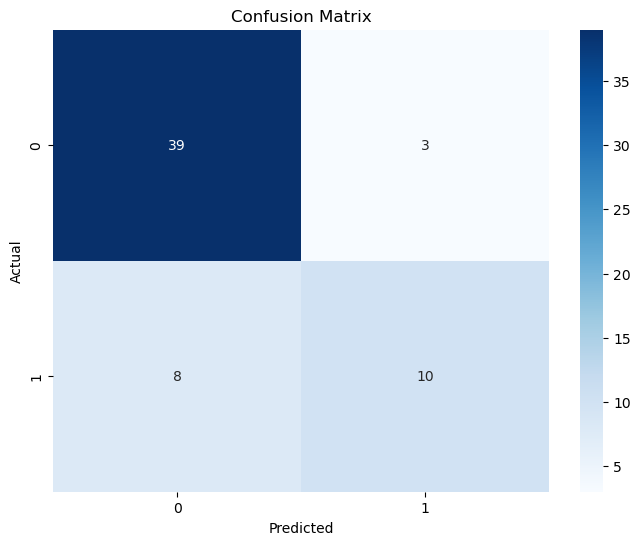

In [74]:
X = data_cluster_0_features.drop(columns=['EventCKD35'])
y = data_cluster_0_features['EventCKD35']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print(f'ROC AUC Score: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Conclusions:
* The model performs better at identifying class 0 instances (negative class) compared to class 1 instances (positive class). This is evident from the higher precision, recall, and F1-score for class 0.



* The model demonstrates strong performance in identifying class 0 instances, with high precision and recall. However, the model struggles more with class 1 instances, with lower recall indicating that it misses a substantial number of positive instances.



* The ROC AUC score of 0.85 suggests that the model has a good overall ability to notice between the two classes, but there is room for improvement, especially in identifying positive instances.



* Compared to the results of the model on the entire population there is room for improvement.
The indicators we received are lower, but it should be noted that the results are good when the sample we received from the cluster results was 8 times smaller and we used a larger test group than usual which indicates that a larger sample is needed in order to improve the model results.


---
---